In [6]:
import pandas as pd, numpy as np, os
from get_draws.api import get_draws
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
from matplotlib.backends.backend_pdf import PdfPages

In [7]:
output_dir = '/ihme/costeffectiveness/results/vivarium_ciff_sam/v5.3.3_sam_k_sensitivity/ciff_sam/2022_02_08_09_51_56/count_data/'

In [8]:
figname = 'model_5.3.3 alternative K'

In [9]:
os.listdir(output_dir)

['wasting_transition_count.hdf',
 'wasting_transition_count.csv',
 'wasting_state_person_time.hdf',
 'deaths.csv',
 'wasting_state_person_time.csv',
 'deaths.hdf',
 'disease_transition_count.csv',
 'births.csv',
 'population.csv',
 'stunting_state_person_time.hdf',
 'ylds.csv',
 'ylls.csv',
 'disease_state_person_time.csv',
 'population.hdf',
 'ylls.hdf',
 'ylds.hdf',
 'disease_state_person_time.hdf',
 'births.hdf',
 'disease_transition_count.hdf',
 'stunting_state_person_time.csv']

# maternal bmi

In [10]:
births = pd.read_csv(output_dir +'births.csv')
birth_count = births.loc[births.measure=='total_births']
bw_sum = births.loc[births.measure=='birth_weight_sum']
lbw_sum = births.loc[births.measure=='low_weight_births']
birth_count.head()

Unnamed: 0     sex  year       measure  input_draw  scenario  \
3072        3072  female  2022  total_births          29  baseline   
3073        3073  female  2022  total_births          29  baseline   
3074        3074  female  2022  total_births          29  baseline   
3075        3075  female  2022  total_births          29  baseline   
3076        3076  female  2022  total_births          29  baseline   

            sam_k   value insecticide_treated_nets maternal_supplementation  \
3072  alternative     0.0                  covered                      bep   
3073  alternative     0.0                uncovered                      bep   
3074  alternative     0.0                  covered                      mmn   
3075  alternative     0.0                uncovered                      mmn   
3076  alternative  1299.0                  covered                      ifa   

     maternal_malnutrition  
3072                  cat2  
3073                  cat2  
3074                  cat2  
3075                  cat2  
3076                  cat2

## check exposure

proportion of babies born to each maternal BMI category
- validation target is 0.224 (95% CI: 0.217, 0.231) for cat1

In [18]:
cols = ['input_draw','sam_k','scenario','maternal_malnutrition']
((birth_count.groupby(cols).sum()
 / birth_count.groupby([c for c in cols if c != 'maternal_malnutrition']).sum())
 .groupby([c for c in cols if c != 'input_draw'])
 .describe(percentiles=[0.025,0.975]))['value']

count      mean  \
sam_k       scenario            maternal_malnutrition                    
alternative baseline            cat1                    12.0  0.224027   
                                cat2                    12.0  0.775973   
            lbwsg_interventions cat1                    12.0  0.224062   
                                cat2                    12.0  0.775938   
            sqlns               cat1                    12.0  0.224145   
                                cat2                    12.0  0.775855   
            wasting_treatment   cat1                    12.0  0.224061   
                                cat2                    12.0  0.775939   
baseline    baseline            cat1                    12.0  0.224018   
                                cat2                    12.0  0.775982   
            lbwsg_interventions cat1                    12.0  0.223930   
                                cat2                    12.0  0.776070   
            sqlns               cat1                    12.0  0.224028   
                                cat2                    12.0  0.775972   
            wasting_treatment   cat1                    12.0  0.224050   
                                cat2                    12.0  0.775950   

                                                            std       min  \
sam_k       scenario            maternal_malnutrition                       
alternative baseline            cat1                   0.003847  0.219056   
                                cat2                   0.003847  0.769396   
            lbwsg_interventions cat1                   0.003886  0.219644   
                                cat2                   0.003886  0.768795   
            sqlns               cat1                   0.003776  0.219460   
                                cat2                   0.003776  0.769145   
            wasting_treatment   cat1                   0.003806  0.219460   
                                cat2                   0.003806  0.769396   
baseline    baseline            cat1                   0.003914  0.218952   
                                cat2                   0.003914  0.769396   
            lbwsg_interventions cat1                   0.003740  0.219398   
                                cat2                   0.003740  0.769396   
            sqlns               cat1                   0.003739  0.219460   
                                cat2                   0.003739  0.769396   
            wasting_treatment   cat1                   0.003886  0.218739   
                                cat2                   0.003886  0.769396   

                                                           2.5%       50%  \
sam_k       scenario            maternal_malnutrition                       
alternative baseline            cat1                   0.219218  0.223626   
                                cat2                   0.769619  0.776374   
            lbwsg_interventions cat1                   0.219645  0.223022   
                                cat2                   0.769183  0.776978   
            sqlns               cat1                   0.219511  0.223329   
                                cat2                   0.769437  0.776671   
            wasting_treatment   cat1                   0.219511  0.223417   
                                cat2                   0.769619  0.776583   
baseline    baseline            cat1                   0.219092  0.223362   
                                cat2                   0.769619  0.776638   
            lbwsg_interventions cat1                   0.219465  0.223309   
                                cat2                   0.769807  0.776691   
            sqlns               cat1                   0.219530  0.223470   
                                cat2                   0.769740  0.776530   
            wasting_treatment   cat1                   0.218988  0.223438   
                          

In [19]:
# check it does not vary by sex
cols = ['input_draw','sam_k','scenario','sex','maternal_malnutrition']
((birth_count.groupby(cols).sum()
 / birth_count.groupby([c for c in cols if c != 'maternal_malnutrition']).sum())
 .groupby([c for c in cols if c != 'input_draw'])
 .describe(percentiles=[0.025,0.975]))['value']

# looks good

count      mean  \
sam_k       scenario            sex    maternal_malnutrition                    
alternative baseline            female cat1                    12.0  0.224132   
                                       cat2                    12.0  0.775868   
                                male   cat1                    12.0  0.223932   
                                       cat2                    12.0  0.776068   
            lbwsg_interventions female cat1                    12.0  0.224116   
                                       cat2                    12.0  0.775884   
                                male   cat1                    12.0  0.224016   
                                       cat2                    12.0  0.775984   
            sqlns               female cat1                    12.0  0.224103   
                                       cat2                    12.0  0.775897   
                                male   cat1                    12.0  0.224189   
                                       cat2                    12.0  0.775811   
            wasting_treatment   female cat1                    12.0  0.224006   
                                       cat2                    12.0  0.775994   
                                male   cat1                    12.0  0.224119   
                                       cat2                    12.0  0.775881   
baseline    baseline            female cat1                    12.0  0.223829   
                                       cat2                    12.0  0.776171   
                                male   cat1                    12.0  0.224202   
                                       cat2                    12.0  0.775798   
            lbwsg_interventions female cat1                    12.0  0.223936   
                                       cat2                    12.0  0.776064   
                                male   cat1                    12.0  0.223930   
                                       cat2                    12.0  0.776070   
            sqlns               female cat1                    12.0  0.224040   
                                       cat2                    12.0  0.775960   
                                male   cat1                    12.0  0.224022   
                                       cat2                    12.0  0.775978   
            wasting_treatment   female cat1                    12.0  0.224106   
                                       cat2                    12.0  0.775894   
                                male   cat1                    12.0  0.224002   
                                       cat2                    12.0  0.775998   

                                                                   std  \
sam_k       scenario            sex    maternal_malnutrition             
alternative baseline            female cat1                   0.003097   
                                       cat2                   0.003097   
                                male   cat1                   0.005055   
                                       cat2                   0.005055   
            lbwsg_interventions female cat1                   0.003247   
                                       cat2                   0.003247   
                                male   cat1                   0.005206   
                                       cat2                   0.005206   
            sqlns               female cat1                   0.003303   
                                       cat2                   0.003303   
                                male   cat1                   0.004885   
                                       cat2                   0.004885   
            wasting_treatment   female cat1                   0.003194   
                                       cat2                   0.003194   
                                male   cat1                   0.005002   
                                       cat2      

In [20]:
# check it does not vary by year
cols = ['input_draw','sam_k','scenario','year','maternal_malnutrition']
((birth_count.groupby(cols).sum()
 / birth_count.groupby([c for c in cols if c != 'maternal_malnutrition']).sum())
 .groupby([c for c in cols if c != 'input_draw'])
 .describe(percentiles=[0.025,0.975]))['value'].head(12)

# looks good

count      mean  \
sam_k       scenario            year maternal_malnutrition                    
alternative baseline            2022 cat1                    12.0  0.223100   
                                     cat2                    12.0  0.776900   
                                2023 cat1                    12.0  0.224997   
                                     cat2                    12.0  0.775003   
                                2024 cat1                    12.0  0.223459   
                                     cat2                    12.0  0.776541   
                                2025 cat1                    12.0  0.223903   
                                     cat2                    12.0  0.776097   
                                2026 cat1                    12.0  0.224686   
                                     cat2                    12.0  0.775314   
            lbwsg_interventions 2022 cat1                    12.0  0.223093   
                                     cat2                    12.0  0.776907   

                                                                 std  \
sam_k       scenario            year maternal_malnutrition             
alternative baseline            2022 cat1                   0.003868   
                                     cat2                   0.003868   
                                2023 cat1                   0.004264   
                                     cat2                   0.004264   
                                2024 cat1                   0.005483   
                                     cat2                   0.005483   
                                2025 cat1                   0.004151   
                                     cat2                   0.004151   
                                2026 cat1                   0.004585   
                                     cat2                   0.004585   
            lbwsg_interventions 2022 cat1                   0.003486   
                                     cat2                   0.003486   

                                                                 min  \
sam_k       scenario            year maternal_malnutrition             
alternative baseline            2022 cat1                   0.217679   
                                     cat2                   0.769964   
                                2023 cat1                   0.217202   
                                     cat2                   0.767791   
                                2024 cat1                   0.214059   
                                     cat2                   0.768527   
                                2025 cat1                   0.217447   
                                     cat2                   0.768805   
                                2026 cat1                   0.217563   
                                     cat2                   0.766483   
            lbwsg_interventions 2022 cat1                   0.218970   
                                     cat2                   0.770356   

                                                                2.5%  \
sam_k       scenario            year maternal_malnutrition             
alternative baseline            2022 cat1                   0.218058   
                                     cat2                   0.770686   
                                2023 cat1                   0.218195   
                                     cat2                   0.767943   
                                2024 cat1                   0.214858   
                                     cat2                   0.769183   
                                2025 cat1                   0.217862   
                                     cat2                   0.769573   
                                2026 cat1                   0.218230   
                                     cat2                   0.767123   
            lbwsg_interventions 2022 cat1                   0.219016   

## Birthweight difference by maternal bmi strata

validation target is -138.46 (95% CI: -174.68, -102.25) for cat1 relative to cat2

In [21]:
((bw_sum.groupby(['input_draw','sam_k','scenario','maternal_malnutrition']).sum()
 / birth_count.groupby(['input_draw','scenario','maternal_malnutrition']).sum())
 .groupby(['scenario','maternal_malnutrition']).describe(percentiles=[0.025,0.975]))['value']

count         mean         std  \
scenario            maternal_malnutrition                                   
baseline            cat1                    24.0  1548.253752   86.922351   
                    cat2                    24.0  1616.110332   89.746455   
lbwsg_interventions cat1                    24.0  1580.241939   64.655659   
                    cat2                    24.0  1631.119296   64.508677   
sqlns               cat1                    24.0  1548.309279   71.173970   
                    cat2                    24.0  1616.004831   74.352304   
wasting_treatment   cat1                    24.0  1548.295849   99.716069   
                    cat2                    24.0  1616.160712  102.830345   

                                                   min         2.5%  \
scenario            maternal_malnutrition                             
baseline            cat1                   1353.848039  1412.932173   
                    cat2                   1421.841460  1477.418472   
lbwsg_interventions cat1                   1480.544178  1487.813754   
                    cat2                   1528.783912  1532.576643   
sqlns               cat1                   1390.776416  1431.294725   
                    cat2                   1439.722569  1486.413470   
wasting_treatment   cat1                   1329.182418  1357.293782   
                    cat2                   1397.650141  1420.286557   

                                                   50%        97.5%  \
scenario            maternal_malnutrition                             
baseline            cat1                   1544.920296  1672.842277   
                    cat2                   1609.292069  1746.345191   
lbwsg_interventions cat1                   1575.291211  1685.329294   
                    cat2                   1626.565827  1733.340428   
sqlns               cat1                   1548.472173  1681.609611   
                    cat2                   1613.901274  1747.004649   
wasting_treatment   cat1                   1548.472173  1726.791700   
                    cat2                   1612.402541  1803.580235   

                                                   max  
scenario            maternal_malnutrition               
baseline            cat1                   1692.633072  
                    cat2                   1774.527983  
lbwsg_interventions cat1                   1690.510374  
                    cat2                   1744.178027  
sqlns               cat1                   1728.429484  
                    cat2                   1803.219569  
wasting_treatment   cat1                   1730.787625  
                    cat2                   1809.156313

In [23]:
data = (bw_sum.groupby(['input_draw','sam_k','scenario','maternal_malnutrition']).sum()
 / birth_count.groupby(['input_draw','sam_k','scenario','maternal_malnutrition']).sum())[['value']].reset_index()
diff = (data.loc[data.maternal_malnutrition=='cat1'].drop(columns='maternal_malnutrition').set_index(['input_draw','sam_k','scenario']) 
        - data.loc[data.maternal_malnutrition=='cat2'].drop(columns='maternal_malnutrition').set_index(['input_draw','sam_k','scenario']))
diff = diff.groupby(['sam_k','scenario']).describe(percentiles=[0.025,0.975])
diff
# looks good, except for lbwsg scenario, which should be explained by BEP coverage

value                                     \
                                count        mean        std         min   
sam_k       scenario                                                       
alternative baseline             12.0 -135.370275  17.291340 -171.642844   
            lbwsg_interventions  12.0 -101.944039  25.976023 -163.291092   
            sqlns                12.0 -135.501115  17.899430 -171.642844   
            wasting_treatment    12.0 -135.740888  18.161926 -171.642844   
baseline    baseline             12.0 -136.067602  17.499529 -171.642844   
            lbwsg_interventions  12.0 -101.571511  26.316495 -163.291092   
            sqlns                12.0 -135.248780  17.672965 -171.642844   
            wasting_treatment    12.0 -135.761742  17.827243 -171.642844   

                                                                     \
                                       2.5%         50%       97.5%   
sam_k       scenario                                                  
alternative baseline            -166.164991 -131.710047 -111.121786   
            lbwsg_interventions -152.383697  -99.174488  -71.763059   
            sqlns               -166.164991 -131.418459 -110.605889   
            wasting_treatment   -166.795388 -131.418459 -110.427571   
baseline    baseline            -166.164991 -133.213062 -110.820955   
            lbwsg_interventions -152.383697  -98.153910  -70.960034   
            sqlns               -166.061074 -130.815103 -110.820955   
            wasting_treatment   -166.164991 -132.316166 -110.820955   

                                             
                                        max  
sam_k       scenario                         
alternative baseline            -110.338217  
            lbwsg_interventions  -71.638540  
            sqlns               -110.299146  
            wasting_treatment   -110.338217  
baseline    baseline            -110.338217  
            lbwsg_interventions  -70.685632  
            sqlns               -110.338217  
            wasting_treatment   -110.338217

In [24]:
# confirm this is the case...
data = (bw_sum.groupby(['input_draw','sam_k','scenario','maternal_malnutrition','maternal_supplementation']).sum()
 / birth_count.groupby(['input_draw','sam_k','scenario','maternal_malnutrition','maternal_supplementation']).sum())[['value']].reset_index()
diff = (data.loc[data.maternal_malnutrition=='cat1'].drop(columns='maternal_malnutrition').set_index(['input_draw','sam_k','scenario','maternal_supplementation']) 
        - data.loc[data.maternal_malnutrition=='cat2'].drop(columns='maternal_malnutrition').set_index(['input_draw','sam_k','scenario','maternal_supplementation']))
diff = diff.groupby(['sam_k','scenario','maternal_supplementation']).describe(percentiles=[0.025,0.975])
diff.dropna()
# looks good!

value              \
                                                         count        mean   
sam_k       scenario            maternal_supplementation                     
alternative baseline            ifa                       12.0 -136.625794   
                                uncovered                 12.0 -133.587211   
            lbwsg_interventions ifa                       12.0 -138.537744   
                                uncovered                 12.0 -134.727297   
            sqlns               ifa                       12.0 -137.124660   
                                uncovered                 12.0 -133.280175   
            wasting_treatment   ifa                       12.0 -136.367364   
                                uncovered                 12.0 -134.888655   
baseline    baseline            ifa                       12.0 -136.682873   
                                uncovered                 12.0 -135.284641   
            lbwsg_interventions ifa                       12.0 -138.573978   
                                uncovered                 12.0 -133.191059   
            sqlns               ifa                       12.0 -136.690578   
                                uncovered                 12.0 -133.283123   
            wasting_treatment   ifa                       12.0 -136.884765   
                                uncovered                 12.0 -134.329160   

                                                                     \
                                                                std   
sam_k       scenario            maternal_supplementation              
alternative baseline            ifa                       19.273619   
                                uncovered                 16.829066   
            lbwsg_interventions ifa                       22.396652   
                                uncovered                 17.336583   
            sqlns               ifa                       19.351070   
                                uncovered                 18.733088   
            wasting_treatment   ifa                       19.623846   
                                uncovered                 18.587124   
baseline    baseline            ifa                       19.612645   
                                uncovered                 18.203170   
            lbwsg_interventions ifa                       22.082147   
                                uncovered                 17.844158   
            sqlns               ifa                       19.819663   
                                uncovered                 17.167900   
            wasting_treatment   ifa                       19.857383   
                                uncovered                 17.644767   

                                                                      \
                                                                 min   
sam_k       scenario            maternal_supplementation               
alternative baseline            ifa                      -177.473931   
                                uncovered                -162.752806   
            lbwsg_interventions ifa                      -178.584135   
                                uncovered                -162.895667   
            sqlns               ifa                      -177.473931   
                                uncovered                -162.752806   
            wasting_treatment   ifa                      -177.473931   
                                uncovered                -162.752806   
baseline    baseline            ifa                      -177.473931   
                                uncovered                -162.752806   
            lbwsg_interventions ifa                      -178.584135   
                                uncovered                -162.895667   
            sqlns               ifa                      -177.473931   
                                uncovered                -162.752806   


## Check proportion low birth weight

This does not have a specific verification target, but is good to check and can be compared to other external literature sources for validation

In [25]:
((lbw_sum.groupby(['input_draw','sam_k','scenario','maternal_malnutrition']).sum()
 / birth_count.groupby(['input_draw','sam_k','scenario','maternal_malnutrition']).sum())
 .groupby(['sam_k','scenario','maternal_malnutrition']).describe(percentiles=[0.025,0.975]))['value']

count      mean  \
sam_k       scenario            maternal_malnutrition                    
alternative baseline            cat1                    12.0  0.144041   
                                cat2                    12.0  0.097000   
            lbwsg_interventions cat1                    12.0  0.124287   
                                cat2                    12.0  0.093697   
            sqlns               cat1                    12.0  0.144033   
                                cat2                    12.0  0.097057   
            wasting_treatment   cat1                    12.0  0.144251   
                                cat2                    12.0  0.096964   
baseline    baseline            cat1                    12.0  0.144250   
                                cat2                    12.0  0.096940   
            lbwsg_interventions cat1                    12.0  0.124501   
                                cat2                    12.0  0.093751   
            sqlns               cat1                    12.0  0.144057   
                                cat2                    12.0  0.097195   
            wasting_treatment   cat1                    12.0  0.143910   
                                cat2                    12.0  0.096997   

                                                            std       min  \
sam_k       scenario            maternal_malnutrition                       
alternative baseline            cat1                   0.008281  0.131367   
                                cat2                   0.003566  0.090886   
            lbwsg_interventions cat1                   0.008779  0.112512   
                                cat2                   0.003769  0.088850   
            sqlns               cat1                   0.008793  0.131481   
                                cat2                   0.003731  0.090918   
            wasting_treatment   cat1                   0.008759  0.131481   
                                cat2                   0.003685  0.090918   
baseline    baseline            cat1                   0.008618  0.131481   
                                cat2                   0.003624  0.090918   
            lbwsg_interventions cat1                   0.008682  0.113116   
                                cat2                   0.003574  0.088948   
            sqlns               cat1                   0.008644  0.131481   
                                cat2                   0.003743  0.090918   
            wasting_treatment   cat1                   0.008486  0.131481   
                                cat2                   0.003793  0.090577   

                                                           2.5%       50%  \
sam_k       scenario            maternal_malnutrition                       
alternative baseline            cat1                   0.132614  0.143560   
                                cat2                   0.091585  0.097109   
            lbwsg_interventions cat1                   0.113427  0.123583   
                                cat2                   0.089016  0.093094   
            sqlns               cat1                   0.132361  0.143575   
                                cat2                   0.091490  0.097451   
            wasting_treatment   cat1                   0.132533  0.143560   
                                cat2                   0.091490  0.097451   
baseline    baseline            cat1                   0.132504  0.143953   
                                cat2                   0.091490  0.097197   
            lbwsg_interventions cat1                   0.113864  0.123812   
                                cat2                   0.089232  0.093165   
            sqlns               cat1                   0.132504  0.143234   
                                cat2                   0.091490  0.097972   
            wasting_treatment   cat1                   0.132504  0.143560   
                          

In [26]:
data = (lbw_sum.groupby(['sam_k','input_draw','scenario','maternal_malnutrition']).sum()
 / birth_count.groupby(['sam_k','input_draw','scenario','maternal_malnutrition']).sum())[['value']].reset_index()
rr = (data.loc[data.maternal_malnutrition=='cat1'].drop(columns='maternal_malnutrition').set_index(['sam_k','input_draw','scenario']) 
        / data.loc[data.maternal_malnutrition=='cat2'].drop(columns='maternal_malnutrition').set_index(['sam_k','input_draw','scenario']))
rr = rr.groupby(['sam_k','scenario']).describe(percentiles=[0.025,0.975])
rr

value                                          \
                                count      mean       std       min      2.5%   
sam_k       scenario                                                            
alternative baseline             12.0  1.485122  0.068714  1.383185  1.389486   
            lbwsg_interventions  12.0  1.326149  0.069485  1.239994  1.244875   
            sqlns                12.0  1.483999  0.069611  1.382215  1.390896   
            wasting_treatment    12.0  1.487710  0.070338  1.383185  1.391599   
baseline    baseline             12.0  1.487954  0.066788  1.383185  1.391599   
            lbwsg_interventions  12.0  1.327766  0.071939  1.240246  1.241523   
            sqlns                12.0  1.482203  0.068839  1.383185  1.391095   
            wasting_treatment    12.0  1.483775  0.067621  1.383185  1.391599   

                                                               
                                      50%     97.5%       max  
sam_k       scenario                                           
alternative baseline             1.489733  1.591036  1.607492  
            lbwsg_interventions  1.337495  1.460802  1.496535  
            sqlns                1.484397  1.592887  1.607492  
            wasting_treatment    1.489813  1.598637  1.607492  
baseline    baseline             1.489813  1.592887  1.607492  
            lbwsg_interventions  1.342235  1.463153  1.496535  
            sqlns                1.481827  1.592887  1.607492  
            wasting_treatment    1.485231  1.591102  1.607492

In [27]:
wasting_pt = pd.read_csv(output_dir +'births.csv')
wasting_pt

Unnamed: 0     sex  year           measure  input_draw  \
0               0  female  2022  birth_weight_sum          29   
1               1  female  2022  birth_weight_sum          29   
2               2  female  2022  birth_weight_sum          29   
3               3  female  2022  birth_weight_sum          29   
4               4  female  2022  birth_weight_sum          29   
...           ...     ...   ...               ...         ...   
46075       46075    male  2026      total_births         946   
46076       46076    male  2026      total_births         946   
46077       46077    male  2026      total_births         946   
46078       46078    male  2026      total_births         946   
46079       46079    male  2026      total_births         946   

                scenario        sam_k         value insecticide_treated_nets  \
0               baseline  alternative  0.000000e+00                  covered   
1               baseline  alternative  0.000000e+00                uncovered   
2               baseline  alternative  0.000000e+00                  covered   
3               baseline  alternative  0.000000e+00                uncovered   
4               baseline  alternative  4.400332e+06                  covered   
...                  ...          ...           ...                      ...   
46075  wasting_treatment     baseline  0.000000e+00                uncovered   
46076  wasting_treatment     baseline  3.620000e+02                  covered   
46077  wasting_treatment     baseline  1.109000e+03                uncovered   
46078  wasting_treatment     baseline  2.730000e+02                  covered   
46079  wasting_treatment     baseline  7.780000e+02                uncovered   

      maternal_supplementation maternal_malnutrition  
0                          bep                  cat2  
1                          bep                  cat2  
2                          mmn                  cat2  
3                          mmn                  cat2  
4                          ifa                  cat2  
...                        ...                   ...  
46075                      mmn                  cat1  
46076                      ifa                  cat1  
46077                      ifa                  cat1  
46078                uncovered                  cat1  
46079                uncovered                  cat1  

[46080 rows x 11 columns]

In [28]:
cols = ['sam_k','input_draw','scenario','sex','age']

wasting_pt = pd.read_csv(output_dir +'wasting_state_person_time.csv').groupby(cols).sum()[['value']]
stunting_pt = pd.read_csv(output_dir +'stunting_state_person_time.csv').groupby(cols).sum()[['value']]
disease_pt = pd.read_csv(output_dir +'disease_state_person_time.csv')
disease_pt['cause'] = disease_pt.cause.str.replace('susceptible_to_','')
disease_pt = disease_pt.groupby(cols+['cause']).sum()[['value']].reset_index()
disease_pt['value'] = disease_pt['value'].round(0)
stunting_pt['value'] = stunting_pt['value'].round(0)
wasting_pt['value'] = wasting_pt['value'].round(0)

assert np.all(disease_pt.loc[disease_pt.cause=='diarrheal_diseases'].drop(columns='cause').set_index(cols) 
        == disease_pt.loc[disease_pt.cause=='lower_respiratory_infections'].drop(columns='cause').set_index(cols))

assert np.all(disease_pt.loc[disease_pt.cause=='diarrheal_diseases'].drop(columns='cause').set_index(cols) 
        == disease_pt.loc[disease_pt.cause=='measles'].drop(columns='cause').set_index(cols))

assert np.all(disease_pt.loc[disease_pt.cause=='diarrheal_diseases'].drop(columns='cause').set_index(cols) 
        == wasting_pt)

assert np.all(disease_pt.loc[disease_pt.cause=='diarrheal_diseases'].drop(columns='cause').set_index(cols) 
        == stunting_pt)

# Wasting and stunting exposures

In [29]:
state_pt = pd.read_csv(output_dir +'wasting_state_person_time.csv')
state_pt.head()

Unnamed: 0     sex  year               cause            measure  \
0           0  female  2022  mild_child_wasting  state_person_time   
1           1  female  2022  mild_child_wasting  state_person_time   
2           2  female  2022  mild_child_wasting  state_person_time   
3           3  female  2022  mild_child_wasting  state_person_time   
4           4  female  2022  mild_child_wasting  state_person_time   

   input_draw  scenario        sam_k  value x_factor   sq_lns mam_treatment  \
0          29  baseline  alternative    0.0     cat2  covered       covered   
1          29  baseline  alternative    0.0     cat1  covered       covered   
2          29  baseline  alternative    0.0     cat2  covered     uncovered   
3          29  baseline  alternative    0.0     cat1  covered     uncovered   
4          29  baseline  alternative    0.0     cat2  covered       covered   

  sam_treatment             age  
0       covered  early_neonatal  
1       covered  early_neonatal  
2       covered  early_neonatal  
3       covered  early_neonatal  
4     uncovered  early_neonatal

In [30]:
groupby_cols = ['input_draw','sam_k','sex','age','cause']

def calculate_child_growth_exposure_prevalence(risk):
    state_pt = pd.read_csv(output_dir +f'{risk}_state_person_time.csv')
    state_pt = state_pt.loc[state_pt.scenario=='baseline']
    state_pt = state_pt.groupby(groupby_cols).sum()[['value']].reset_index()
    if risk=='wasting':
        state_pt_exposed = state_pt.loc[state_pt.cause.str.contains('acute_malnutrition')]
        state_pt_exposed['cause'] = 'wasted'
    else:
        state_pt_exposed = state_pt.loc[state_pt.cause.isin(['cat1','cat2'])]
        state_pt_exposed['cause'] = 'stunted'
    state_pt_with_exposed = (pd.concat([state_pt, 
                          state_pt_exposed.groupby(groupby_cols).sum().reset_index()],
                         ignore_index=True)
                .set_index(groupby_cols))
    prev = state_pt_with_exposed / state_pt.groupby([c for c in groupby_cols if c != 'cause']).sum()
    prev = prev.groupby([c for c in groupby_cols if c != 'input_draw']).describe(percentiles=[0.025,0.975]).sort_index()
    return prev

In [31]:
wasting_prev = calculate_child_growth_exposure_prevalence('wasting')
wasting_prev.head()

value            \
                                                           count      mean   
sam_k       sex    age        cause                                          
alternative female 1-5_months mild_child_wasting            12.0  0.201551   
                              moderate_acute_malnutrition   12.0  0.079817   
                              severe_acute_malnutrition     12.0  0.022660   
                              susceptible_to_child_wasting  12.0  0.695972   
                              wasted                        12.0  0.102477   

                                                                      \
                                                                 std   
sam_k       sex    age        cause                                    
alternative female 1-5_months mild_child_wasting            0.002257   
                              moderate_acute_malnutrition   0.002844   
                              severe_acute_malnutrition     0.001704   
                              susceptible_to_child_wasting  0.004887   
                              wasted                        0.004352   

                                                                      \
                                                                 min   
sam_k       sex    age        cause                                    
alternative female 1-5_months mild_child_wasting            0.196134   
                              moderate_acute_malnutrition   0.075203   
                              severe_acute_malnutrition     0.019746   
                              susceptible_to_child_wasting  0.691133   
                              wasted                        0.095602   

                                                                      \
                                                                2.5%   
sam_k       sex    age        cause                                    
alternative female 1-5_months mild_child_wasting            0.197265   
                              moderate_acute_malnutrition   0.075382   
                              severe_acute_malnutrition     0.020102   
                              susceptible_to_child_wasting  0.691208   
                              wasted                        0.095825   

                                                                      \
                                                                 50%   
sam_k       sex    age        cause                                    
alternative female 1-5_months mild_child_wasting            0.201566   
                              moderate_acute_malnutrition   0.079522   
                              severe_acute_malnutrition     0.022985   
                              susceptible_to_child_wasting  0.695176   
                              wasted                        0.102469   

                                                                                
                                                               97.5%       max  
sam_k       sex    age        cause                                             
alternative female 1-5_months mild_child_wasting            0.204273  0.204349  
                              moderate_acute_malnutrition   0.083865  0.083951  
                              severe_acute_malnutrition     0.025063  0.025404  
                              susceptible_to_child_wasting  0.706273  0.708264  
                              wasted                        0.108025  0.108107

In [32]:
stunting_prev = calculate_child_growth_exposure_prevalence('stunting')
stunting_prev.head()

value                                \
                                      count      mean       std       min   
sam_k       sex    age        cause                                         
alternative female 1-5_months cat1     12.0  0.040329  0.003945  0.035205   
                              cat2     12.0  0.108298  0.003080  0.103592   
                              cat3     12.0  0.204417  0.007247  0.190281   
                              cat4     12.0  0.646956  0.008193  0.633349   
                              stunted  12.0  0.148627  0.005991  0.140429   

                                                                               
                                           2.5%       50%     97.5%       max  
sam_k       sex    age        cause                                            
alternative female 1-5_months cat1     0.035548  0.039283  0.048169  0.048835  
                              cat2     0.103698  0.108634  0.113052  0.113361  
                              cat3     0.190858  0.205064  0.214525  0.215648  
                              cat4     0.634423  0.647537  0.660272  0.661828  
                              stunted  0.140466  0.148534  0.159236  0.159772

In [33]:
# artifact
from vivarium import Artifact
art = Artifact('/ihme/costeffectiveness/artifacts/vivarium_ciff_sam/ethiopia.hdf',
               filter_terms=['year_start == 2020', f'age_end <= 5'])

In [34]:
def load_child_growth_artifact_prev(risk):
    data = art.load(f'risk_factor.child_{risk}.exposure').reset_index()
    data_exposed = data.loc[data.parameter.isin(['cat1','cat2'])]
    data_exposed['parameter'] = 'exposed'
    data_exposed = data_exposed.groupby([c for c in data_exposed.columns if c != 'value' and 'draw' not in c]).sum().reset_index()
    data = pd.concat([data,data_exposed], ignore_index=True)
    data = data.set_index([c for c in data.columns if 'draw' not in c])
    data = (data.apply(pd.DataFrame.describe, percentiles=[0.025, 0.975], axis=1)
            .filter(['mean', '2.5%', '97.5%']).reset_index())
    data['age'] = 0
    data['age'] = np.where(data['age_start'] == 0, 'early_neonatal', #1
                                            np.where(data['age_end'] == 0.5, '1-5_months', #3
                                                     np.where(data['age_start'] == 0.5, '6-11_months', #4
                                                              np.where(data['age_start'] == 1, '12_to_23_months',  #5
                                                                       np.where(data['age_start'] == 2, '2_to_4',       #6
                                                                       'late_neonatal'))))) #2
    data['age_group'] = np.where(data['age'] == 'early_neonatal', 1,
                                   np.where(data['age'] == 'late_neonatal', 2,
                                            np.where(data['age'] == '1-5_months', 3, 
                                                     np.where(data['age'] == '6-11_months', 4, 
                                                              np.where(data['age'] == '12_to_23_months', 5,
                                    6)))))
    data['sex'] = np.where(data['sex'] == 'Female', 'female', 'male')
    
    return data

In [35]:
wasting_art = load_child_growth_artifact_prev('wasting')
wasting_art.head()

sex  age_start   age_end  year_start  year_end parameter      mean  \
0  female   0.000000  0.019178        2020      2021      cat1  0.023100   
1  female   0.000000  0.019178        2020      2021      cat2  0.080399   
2  female   0.000000  0.019178        2020      2021      cat3  0.200563   
3  female   0.000000  0.019178        2020      2021      cat4  0.695938   
4  female   0.019178  0.076712        2020      2021      cat1  0.023190   

       2.5%     97.5%             age  age_group  
0  0.019989  0.026792  early_neonatal          1  
1  0.076361  0.084449  early_neonatal          1  
2  0.195923  0.205312  early_neonatal          1  
3  0.687181  0.704784  early_neonatal          1  
4  0.019931  0.027105   late_neonatal          2

In [36]:
stunting_art = load_child_growth_artifact_prev('stunting')
stunting_art.head()

sex  age_start   age_end  year_start  year_end parameter  mean  2.5%  \
0  female   0.000000  0.019178        2020      2021      cat1   0.0   0.0   
1  female   0.000000  0.019178        2020      2021      cat2   0.0   0.0   
2  female   0.000000  0.019178        2020      2021      cat3   0.0   0.0   
3  female   0.000000  0.019178        2020      2021      cat4   1.0   1.0   
4  female   0.019178  0.076712        2020      2021      cat1   0.0   0.0   

   97.5%             age  age_group  
0    0.0  early_neonatal          1  
1    0.0  early_neonatal          1  
2    0.0  early_neonatal          1  
3    1.0  early_neonatal          1  
4    0.0   late_neonatal          2

In [39]:
def plot_cgf_exposure(wasting_prev, wasting_art, sex, art_severity, sim_severity, title_severity):
    plt.figure(dpi=120)
    a = wasting_art.loc[wasting_art.sex==sex].loc[wasting_art.parameter==art_severity].reset_index()
    plt.plot(a['age'].values, a['mean'].values, marker='o', label='Artifact')
    plt.fill_between(a['age'], a['2.5%'], a['97.5%'], alpha=0.4)

    s = wasting_prev.reset_index()
    s['order'] = np.where(s.age=='early_neonatal', 0,
                         np.where(s.age=='late_neonatal', 1,
                                 np.where(s.age=='1-5_months',2,
                                         np.where(s.age=='6-11_months',3,
                                                 np.where(s.age=='12_to_23_months',4,5)))))
    s = s.sort_values(by='order')
    s = s.loc[s.sex==f'{sex}'].loc[(s.cause==f'{sim_severity}')]
    sb = s.loc[s.sam_k=='baseline']
    sa = s.loc[s.sam_k=='alternative']
    plt.plot(sb['age'], sb['value','mean'], marker='o', label=f'Simulation baseline K')
    plt.fill_between(sb['age'], sb['value','2.5%'], sb['value','97.5%'], alpha=0.2)
    
    plt.plot(sa['age'], sa['value','mean'], marker='o', label=f'Simulation alternative K')
    plt.fill_between(sa['age'], sa['value','2.5%'], sa['value','97.5%'], alpha=0.2)
    
    plt.xticks(rotation=60)
    plt.title(f'{title_severity} exposure: {sex}s')
    plt.legend()
    plt.ylabel('Proportion')
    plt.ylim(0,max(sa['value','97.5%'])*1.25)
    plt.grid()

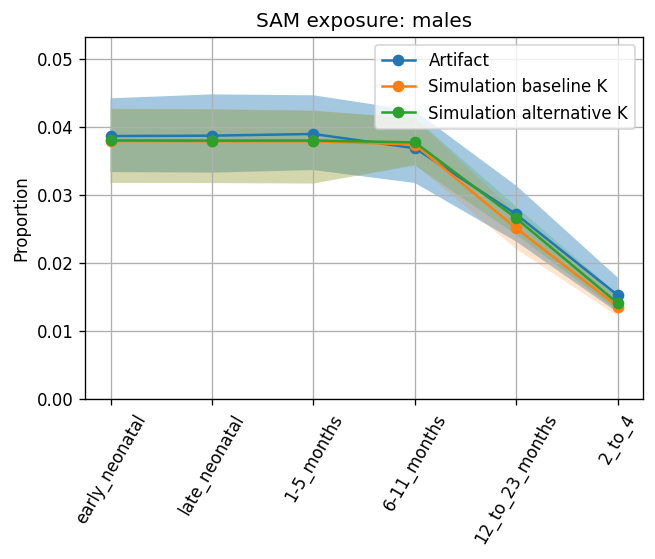

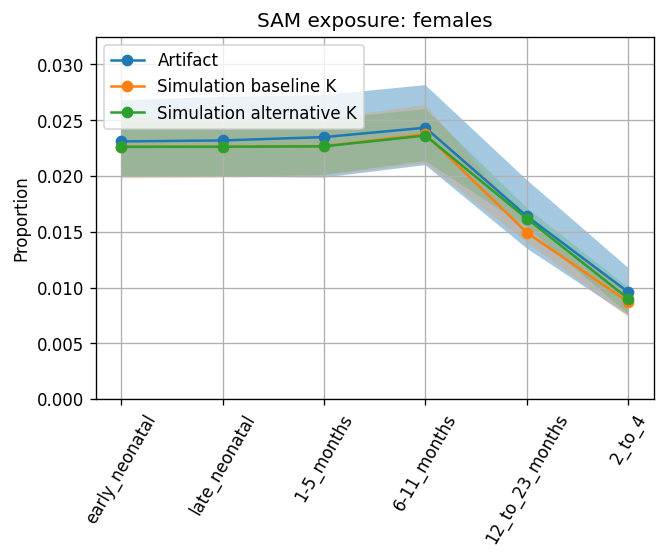

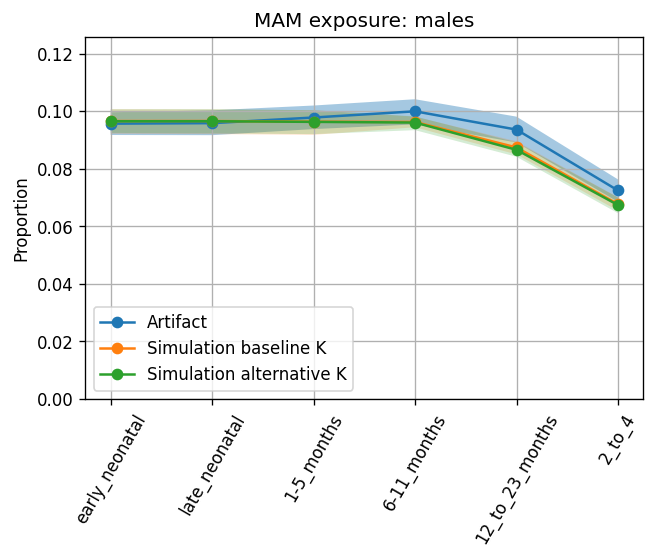

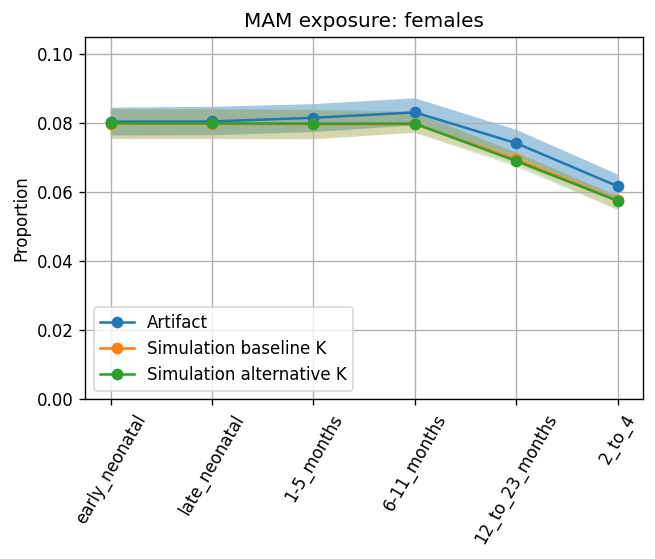

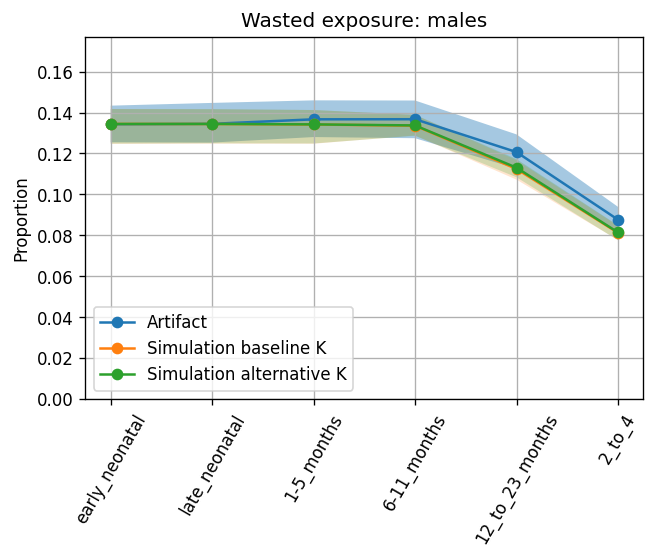

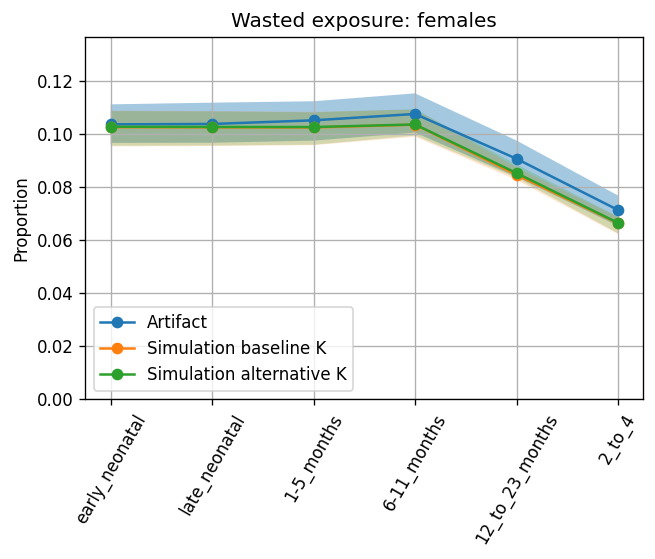

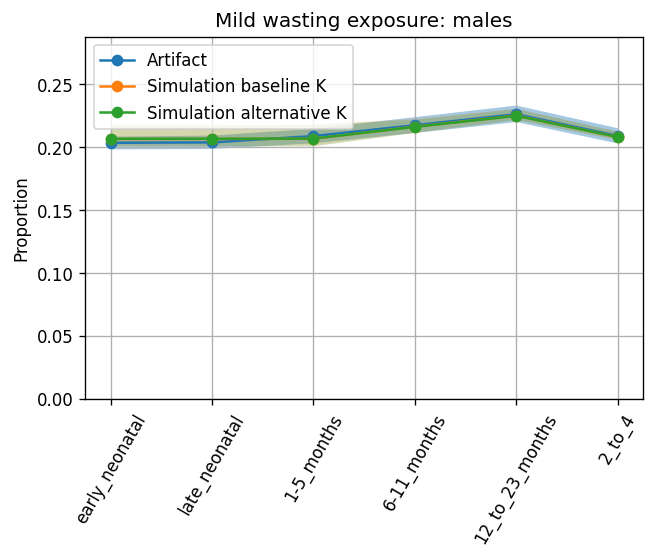

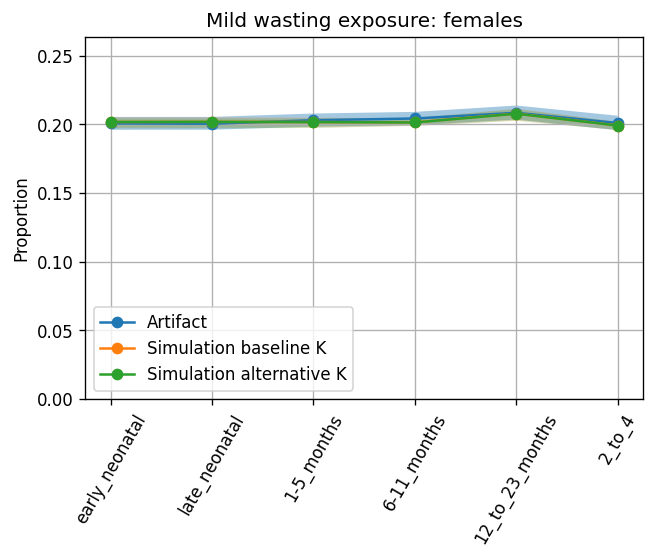

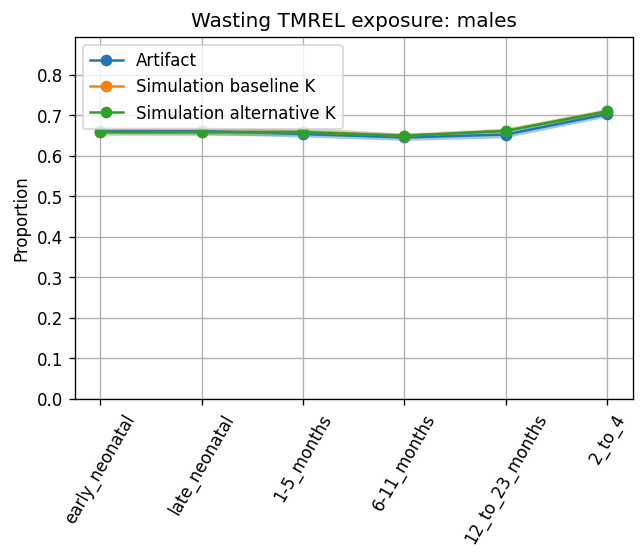

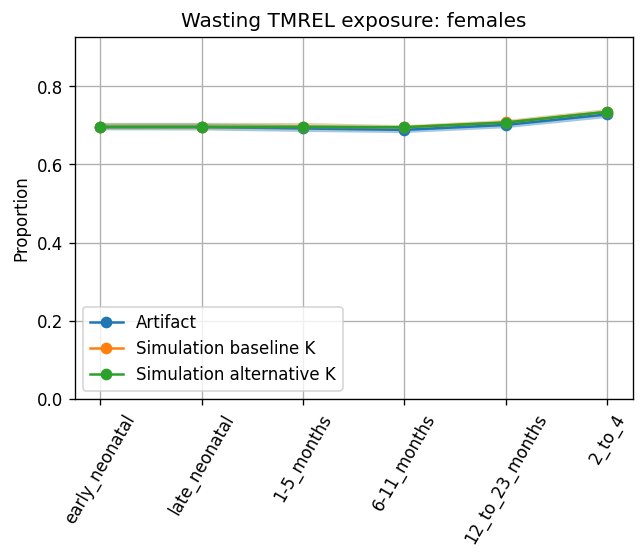

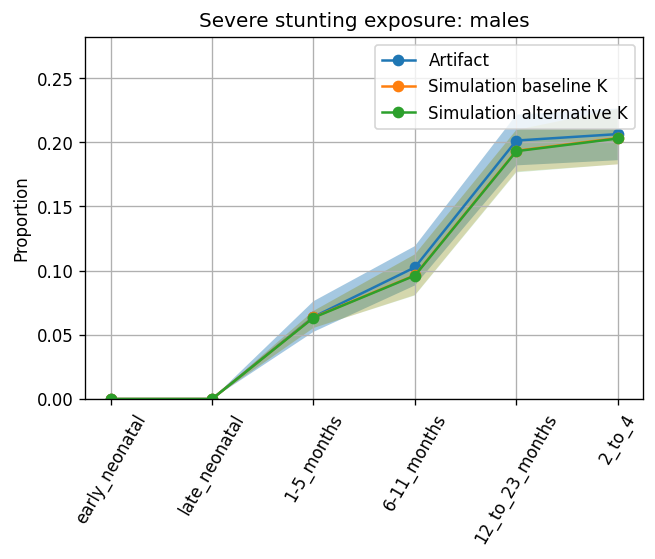

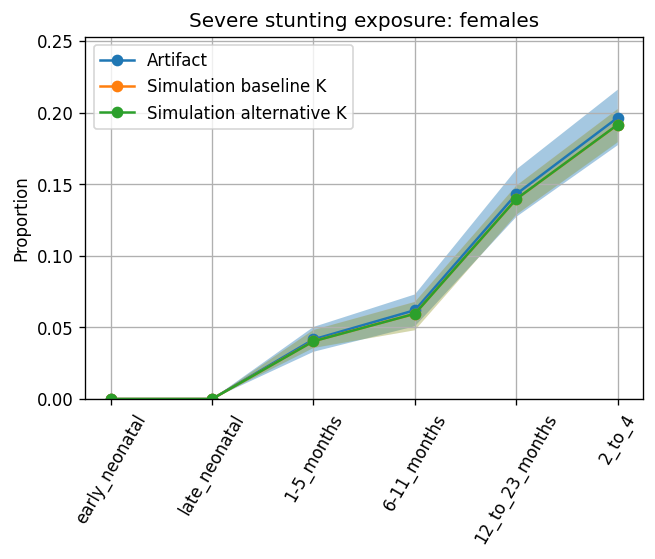

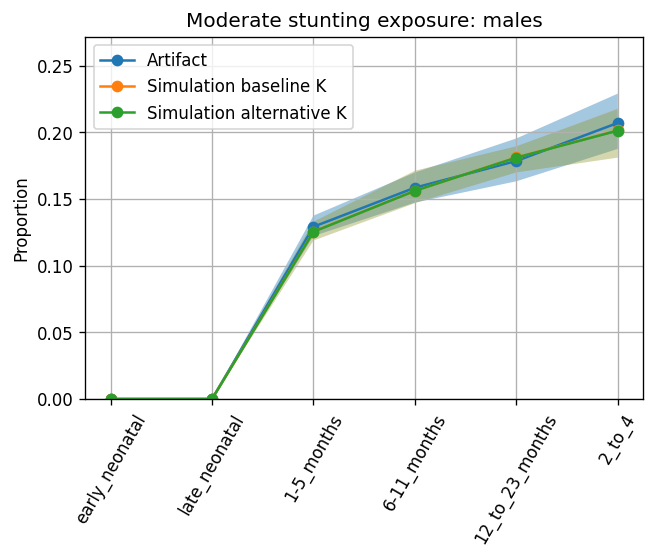

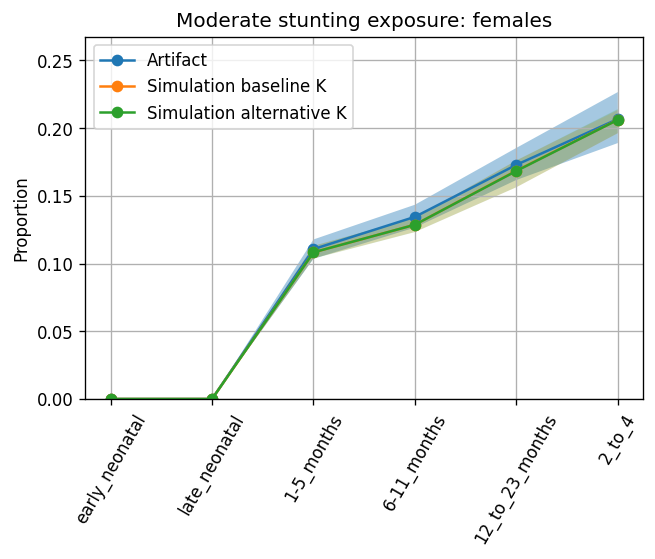

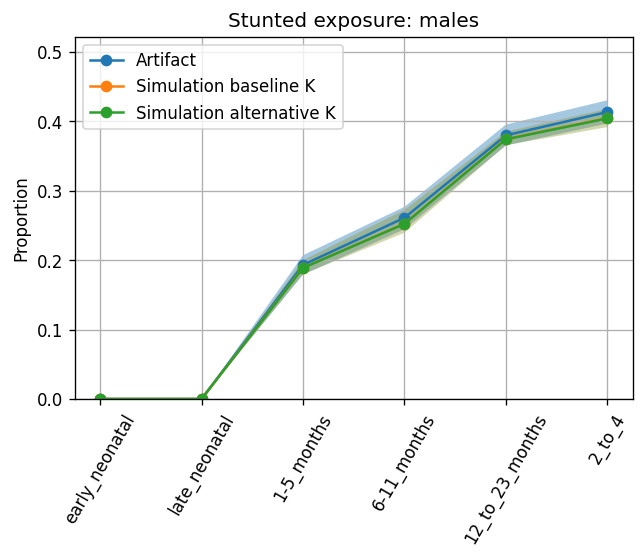

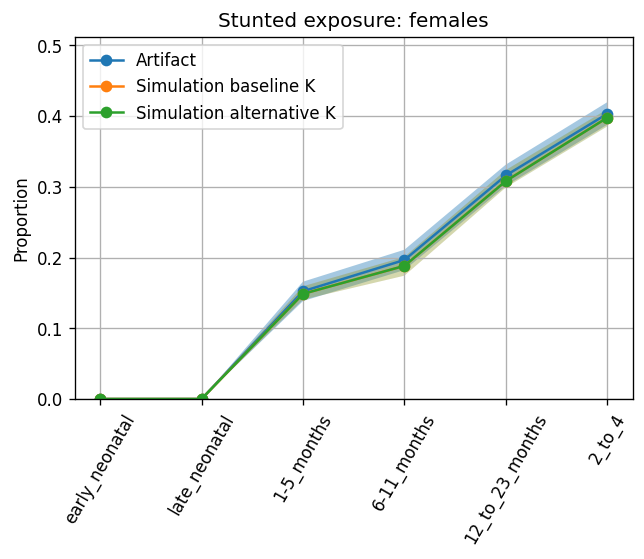

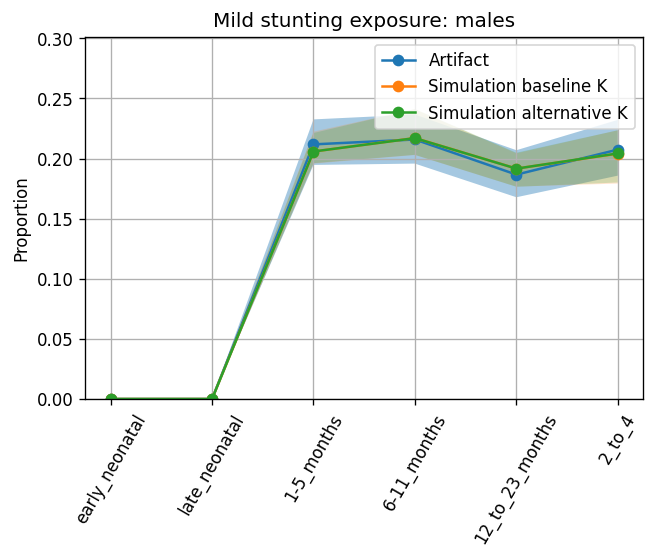

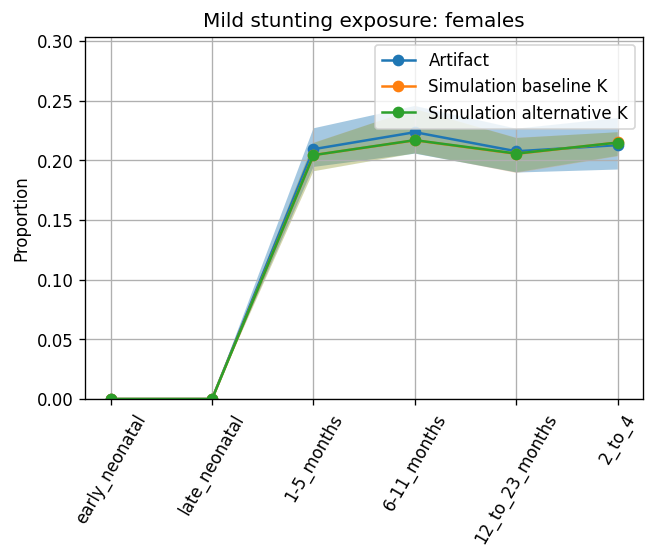

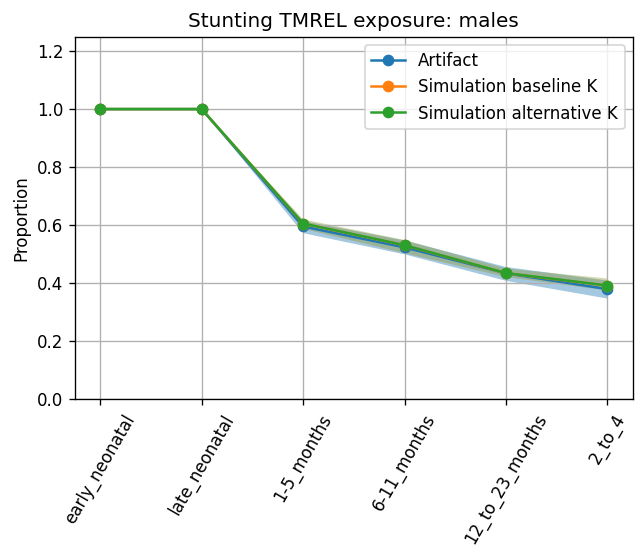

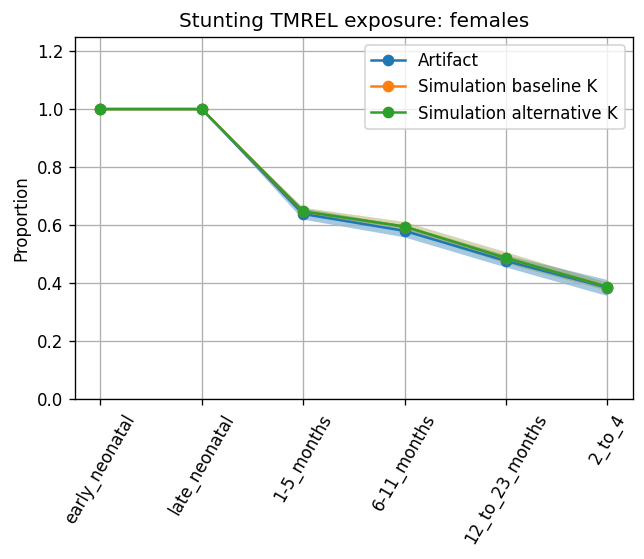

In [52]:
w_sim_cats = ['severe_acute_malnutrition','moderate_acute_malnutrition','wasted',
              'mild_child_wasting','susceptible_to_child_wasting']
s_sim_cats = ['cat1','cat2','stunted',
              'cat3','cat4']
art_cats = ['cat1','cat2','exposed','cat3','cat4']
w_title_cats = ['SAM','MAM','Wasted','Mild wasting','Wasting TMREL']
s_title_cats = ['Severe stunting','Moderate stunting','Stunted','Mild stunting','Stunting TMREL']

with PdfPages(f'plots/{figname}_exposure.pdf') as pdf:
    for i in list(range(0,len(art_cats))):
        for sex in ['male','female']:
            plot_cgf_exposure(wasting_prev, wasting_art, f'{sex}', art_cats[i],
                              w_sim_cats[i], w_title_cats[i])
            pdf.savefig(bbox_inches='tight')
    for i in list(range(0,len(art_cats))):
        for sex in ['male','female']:
            plot_cgf_exposure(stunting_prev, stunting_art, f'{sex}', 
                              art_cats[i], s_sim_cats[i], s_title_cats[i])
            pdf.savefig(bbox_inches='tight')

# Cause parameters

In [53]:
def load_artifact_cause_data(measure, cause):
    data = art.load(f'cause.{cause}.{measure}')
    data = (data.apply(pd.DataFrame.describe, percentiles=[0.025, 0.975], axis=1)
            .filter(['mean', '2.5%', '97.5%']).reset_index())
    data['age'] = 0
    data['age'] = np.where(data['age_start'] == 0, 'early_neonatal', #1
                                            np.where(data['age_end'] == 0.5, '1-5_months', #3
                                                     np.where(data['age_start'] == 0.5, '6-11_months', #4
                                                              np.where(data['age_start'] == 1, '12_to_23_months',  #5
                                                                       np.where(data['age_start'] == 2, '2_to_4',       #6
                                                                       'late_neonatal'))))) #2
    data['age_group'] = np.where(data['age'] == 'early_neonatal', 1,
                                   np.where(data['age'] == 'late_neonatal', 2,
                                            np.where(data['age'] == '1-5_months', 3, 
                                                     np.where(data['age'] == '6-11_months', 4, 
                                                              np.where(data['age'] == '12_to_23_months', 5,
                                    6)))))
    data['sex'] = np.where(data['sex'] == 'Female', 'female', 'male')
    data['measure'] = measure
    data['cause'] = cause
    return data

In [54]:
artifact_data = pd.DataFrame()
causes=['all_causes','diarrheal_diseases','lower_respiratory_infections','protein_energy_malnutrition','measles']
measures=['prevalence','incidence_rate','remission_rate',
               'cause_specific_mortality_rate','excess_mortality_rate']
for cause in causes:    
    for measure in measures:
        try:
            temp = load_artifact_cause_data(measure, cause)
            artifact_data = pd.concat([artifact_data,temp], ignore_index=True)
        except:
            pass
artifact_data = artifact_data.sort_values(by='age_group')
artifact_data.head()

sex  age_start   age_end  year_start  year_end        mean  \
0    female        0.0  0.019178        2020      2021    0.869707   
42     male        0.0  0.019178        2020      2021  104.357143   
48   female        0.0  0.019178        2020      2021    0.008350   
54     male        0.0  0.019178        2020      2021    0.010762   
192  female        0.0  0.019178        2020      2021    0.000000   

           2.5%       97.5%             age  age_group  \
0      0.700294    1.093357  early_neonatal          1   
42   104.357143  104.357143  early_neonatal          1   
48     0.004183    0.016337  early_neonatal          1   
54     0.005863    0.018621  early_neonatal          1   
192    0.000000    0.000000  early_neonatal          1   

                           measure               cause  
0    cause_specific_mortality_rate          all_causes  
42                  remission_rate  diarrheal_diseases  
48   cause_specific_mortality_rate  diarrheal_diseases  
54   cause_specific_mortality_rate  diarrheal_diseases  
192          excess_mortality_rate             measles

In [55]:
# load GBD cause data
cause_ids = [302,341,322,294]
age_group_ids = [2,3,4,5]
sex_ids = [1,2]
location_id = 179

In [56]:
from db_queries import get_outputs

In [85]:
#gbd_data = get_outputs(gbd_round_id=6,
#                    topic='cause',
#                       cause_id=cause_ids,
#                       location_id=location_id,
#                       sex_id=sex_ids,
#                       age_group_id=age_group_ids,
#                       year_id=2019,
#                       measure_id=[1,5,6],
#                       metric_id=3,
#                      decomp_step='step5')
#gbd_data

In [72]:
groupby_cols = ['sam_k','input_draw','sex','age']

In [73]:
state_pt = pd.read_csv(output_dir + 'disease_state_person_time.csv')
transitions = pd.read_csv(output_dir + 'disease_transition_count.csv')
deaths = pd.read_csv(output_dir + 'deaths.csv')
deaths.head()

Unnamed: 0     sex  year               cause measure  input_draw  scenario  \
0           0  female  2022  diarrheal_diseases   death          29  baseline   
1           1  female  2022  diarrheal_diseases   death          29  baseline   
2           2  female  2022  diarrheal_diseases   death          29  baseline   
3           3  female  2022  diarrheal_diseases   death          29  baseline   
4           4  female  2022  diarrheal_diseases   death          29  baseline   

         sam_k  value                 wasting_state             age  
0  alternative    0.0  susceptible_to_child_wasting  early_neonatal  
1  alternative    0.0            mild_child_wasting  early_neonatal  
2  alternative    0.0   moderate_acute_malnutrition  early_neonatal  
3  alternative    0.0     severe_acute_malnutrition  early_neonatal  
4  alternative    8.0  susceptible_to_child_wasting   late_neonatal

In [74]:
def calculate_csmr():
    d = deaths.loc[deaths.scenario=='baseline']
    pem = d.loc[d.cause.str.contains('acute_malnutrition')]
    pem['cause'] = 'protein_energy_malnutrition'
    acmr = d.copy()
    acmr['cause'] = 'all_causes'
    d = pd.concat([d.loc[d.cause.isin(['diarrheal_diseases','lower_respiratory_infections','measles'])],
                  pem, acmr], ignore_index=True)
    d = d.groupby(groupby_cols + ['cause']).sum()
    pt = (state_pt.loc[state_pt.cause.str.contains('measles')]
          .loc[state_pt.scenario=='baseline']
          .groupby(groupby_cols).sum())
    d = ((d / pt)[['value']])
         #.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause'])
         #.describe(percentiles=[0.025,0.975]))
    return d

In [75]:
def calculate_transition_rates():
    trans = transitions.loc[transitions.scenario=='baseline']
    trans['cause'] = trans['measure'].str.split('to_', expand=True)[2].str.split('_event_count', expand=True)[0]
    trans['measure'] = np.where(trans.measure.str.contains('to_susceptible_to'),'remission','incidence')
    trans = trans.groupby(groupby_cols+['cause','measure']).sum()
    pt = (state_pt.loc[state_pt.cause.str.contains('measles')]
          .loc[state_pt.scenario=='baseline']
          .groupby(groupby_cols).sum())
    trans = (trans / pt)[['value']]
    #trans = trans#.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause','measure']).describe(percentiles=[0.025,0.975])
    return trans

In [76]:
def calculate_prevalence(causes):
    s = state_pt.copy()
    s = s.loc[s.scenario=='baseline']
    prev = pd.DataFrame()
    for cause in causes:
        infected = state_pt.loc[state_pt.cause==cause].groupby(groupby_cols + ['cause']).sum()
        total = state_pt.loc[state_pt.cause.str.contains(cause)].groupby(groupby_cols).sum()
        temp = (infected / total)[['value']]#.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause']).describe(percentiles=[0.025,0.975])
        prev = pd.concat([prev,temp])
    return prev

In [77]:
def calculate_child_growth_exposure_prevalence_by_draw(risk):
    state_pt = pd.read_csv(output_dir +f'{risk}_state_person_time.csv')
    state_pt = state_pt.loc[state_pt.scenario=='baseline']
    state_pt = state_pt.groupby(['input_draw','sex','age','cause']).sum()[['value']]
    prev = state_pt / state_pt.groupby(['input_draw','sex','age']).sum()
    #prev = prev.groupby(['sex','age','cause']).describe(percentiles=[0.025,0.975])
    return prev

In [86]:
csmr = calculate_csmr()
trans = calculate_transition_rates()
prev = calculate_prevalence(['diarrheal_diseases','measles','lower_respiratory_infections'])
pem_prev = calculate_child_growth_exposure_prevalence_by_draw('wasting').reset_index()
pem_prev = (pem_prev.loc[pem_prev.cause.str.contains('acute_malnutrition')]
            .groupby(['input_draw','sex','age']).sum().reset_index())
pem_prev['cause'] = 'protein_energy_malnutrition'
prev = pd.concat([prev.reset_index(), pem_prev], ignore_index=True).set_index(groupby_cols + ['cause'])
remission = trans / prev
incidence = trans / (1 - prev)
emr = csmr / prev

prev=prev.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause']).describe(percentiles=[0.025,0.975])
trans=trans.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause','measure']).describe(percentiles=[0.025,0.975])
remission=remission.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause','measure']).describe(percentiles=[0.025,0.975])
incidence=incidence.groupby([c for c in groupby_cols if c !='input_draw'] + ['cause','measure']).describe(percentiles=[0.025,0.975])
emr=emr.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause']).describe(percentiles=[0.025,0.975])
csmr=csmr.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause']).describe(percentiles=[0.025,0.975])

/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.8/site-packages/pandas/core/indexes/multi.py:3559: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  result = lib.fast_unique_multiple([self._values, rvals], sort=sort)


In [87]:
#gbd_data['sex'] = gbd_data.sex.str.lower()
#gbd_data['cause'] = gbd_data.cause_name.str.lower().str.replace(' ','_')
#gbd_data['measure'] = np.where(gbd_data.measure_name == 'Deaths', 'cause_specific_mortality_rate',
#                              np.where(gbd_data.measure_name == 'Incidence', 'incidence_rate',
#                                      'prevalence'))
#gbd_data['age'] = np.where(gbd_data.age_group_id.isin([2,3]), gbd_data.age_group_name.str.lower().str.replace(' ','_'),
#                          np.where(gbd_data.age_group_id==4, '1-5_months', '12_to_23_months'))
#gbd_data_4 = gbd_data.loc[gbd_data.age_group_id==4]
#gbd_data_4['age'] = '6-11_months'
#gbd_data_4['age_group_id'] = 4.5
#gbd_data_5 = gbd_data.loc[gbd_data.age_group_id==5]
#gbd_data_5['age'] = '2_to_4'
#gbd_data_5['age_group_id'] = 5.5
#gbd_data = pd.concat([gbd_data,gbd_data_4,gbd_data_5]).sort_values(by='age_group_id')
#gbd_data.head()

In [88]:
def plot_cause_data(measure, cause, sex):
    
    a = artifact_data.loc[artifact_data.sex==sex].loc[artifact_data.measure==measure].loc[artifact_data.cause==cause]
    assert len(a)>0
    plt.figure(dpi=120)
    plt.plot(a['age'], a['mean'], marker='o', label='Artifact data')
    plt.fill_between(a['age'], a['2.5%'], a['97.5%'], alpha=0.2)
    
    #g = gbd_data.loc[(gbd_data.sex==sex)
    #                &(gbd_data.cause==cause)
    #                &(gbd_data.measure==measure)]
    #plt.plot(g['age'], g['val'], marker='o', label='GBD data')
    #plt.fill_between(g['age'], g['lower'], g['upper'], alpha=0.2)
    
    if measure=='cause_specific_mortality_rate':
        sim_data = csmr.copy()
    elif measure=='prevalence':
        sim_data=prev.copy()
    elif measure=='incidence_rate':
        sim_data=incidence.reset_index().loc[incidence.reset_index().measure=='incidence']
    elif measure=='remission_rate':
        sim_data=remission.reset_index().loc[remission.reset_index().measure=='remission']
    elif measure=='excess_mortality_rate':
        sim_data = emr.copy()
    sim = sim_data.reset_index()
    sim['order'] = np.where(sim.age=='early_neonatal', 0,
                     np.where(sim.age=='late_neonatal', 1,
                             np.where(sim.age=='1-5_months',2,
                                     np.where(sim.age=='6-11_months',3,
                                             np.where(sim.age=='12_to_23_months',4,5)))))
    sim = sim.sort_values(by=['order'])
    for sam_k in ['baseline','alternative']:
        s = sim.loc[(sim.sex==sex)
                 &(sim.cause==cause)
                 &(sim.sam_k==sam_k)]
        plt.plot(s['age'], s['value','mean'], marker='o', label=f'Simulation: {sam_k} k value')
        plt.fill_between(s['age'], s['value','2.5%'], s['value','97.5%'], alpha=0.2)
    if cause=='all_causes':
        plt.semilogy()
    plt.grid()
    plt.xticks(rotation=60)
    plt.legend()
    cause_title = cause.replace('_',' ').capitalize()
    measure_title = measure.replace('_',' ')
    plt.title(f'{cause_title} {measure_title}\n{sex.capitalize()}s')

<ipython-input-88-aa29d6d8e57b>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(dpi=120)


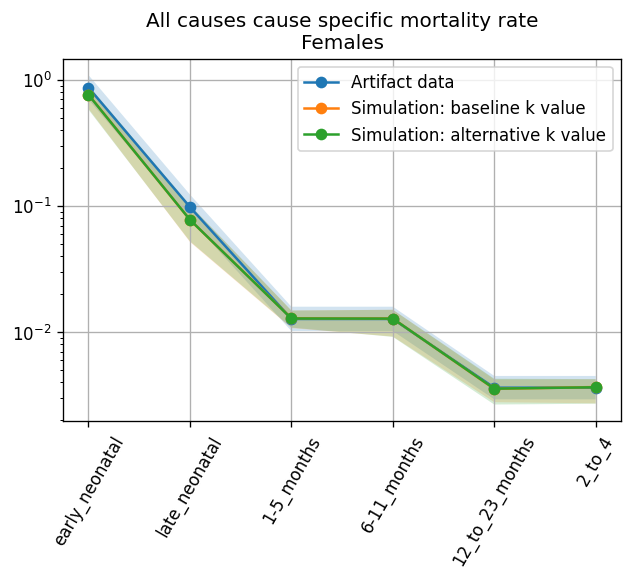

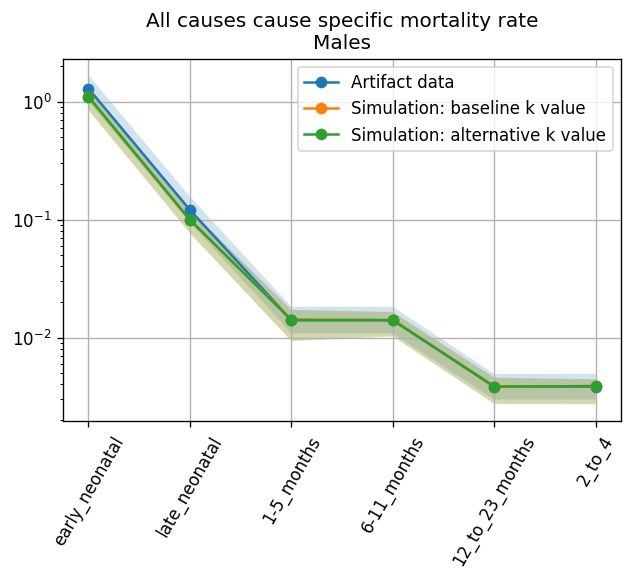

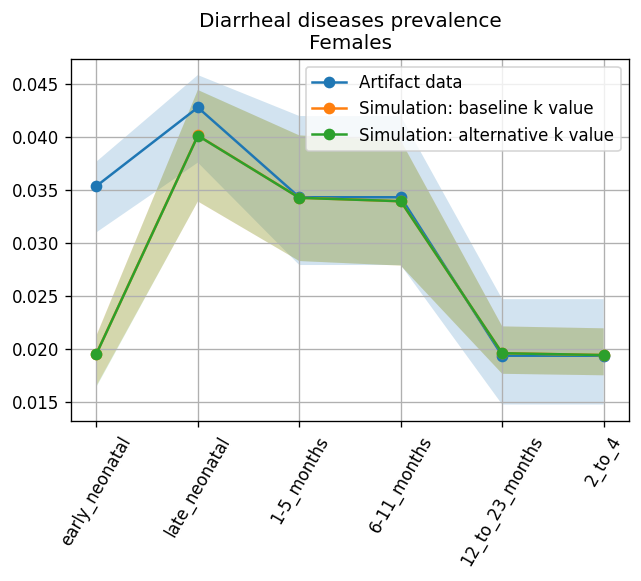

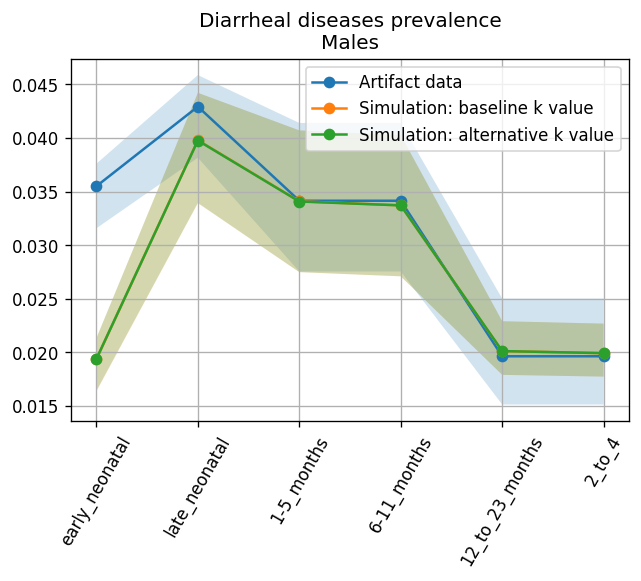

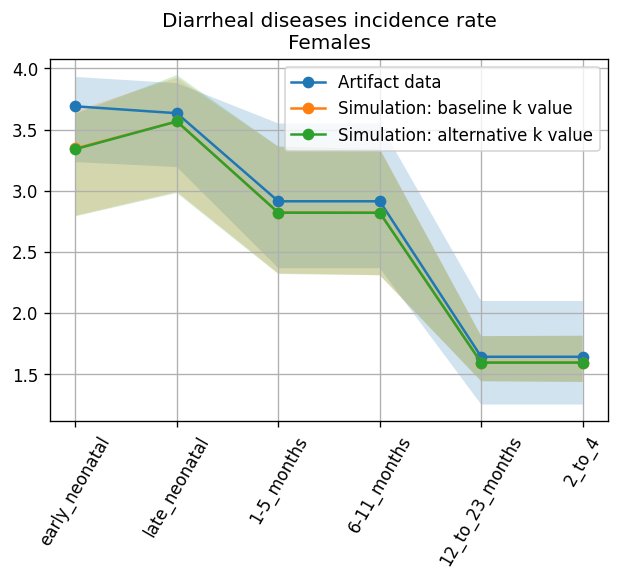

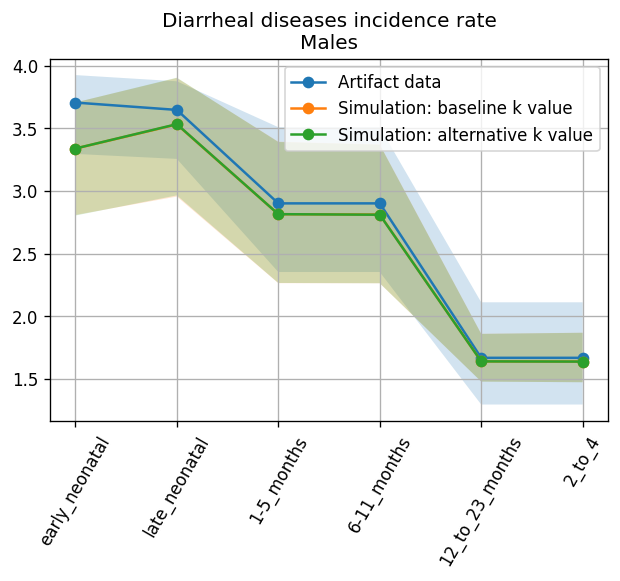

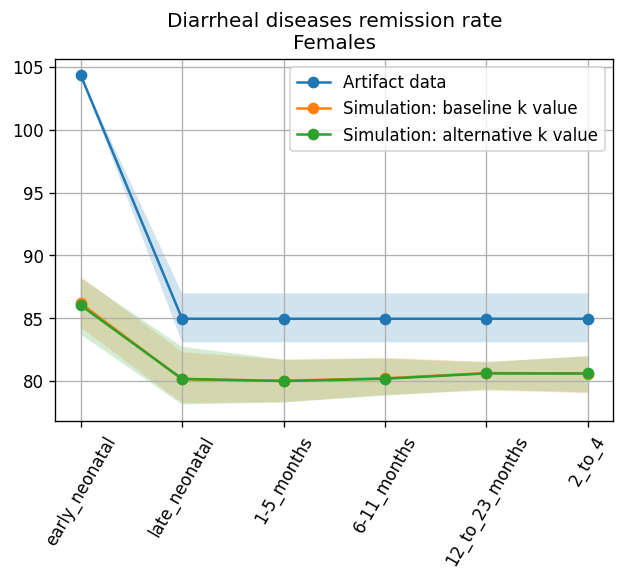

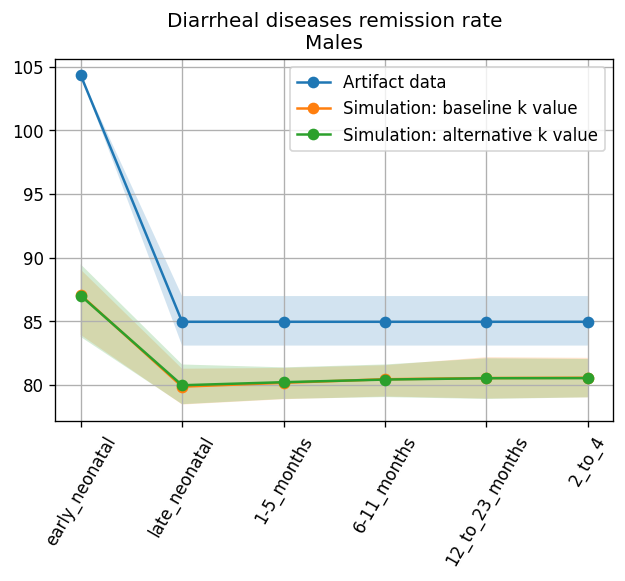

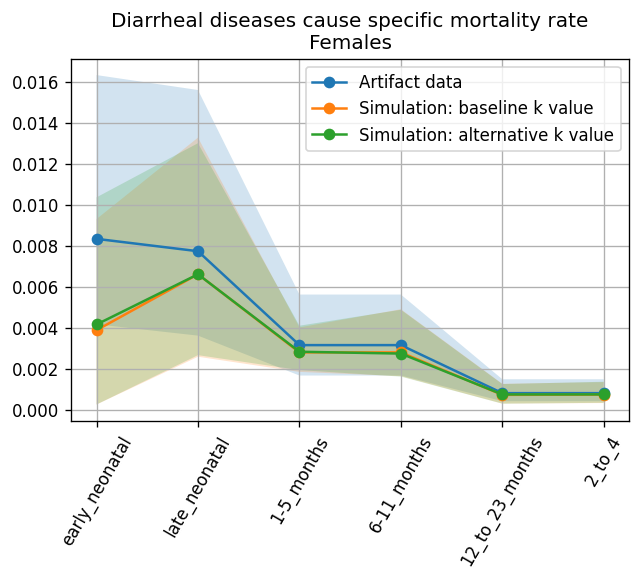

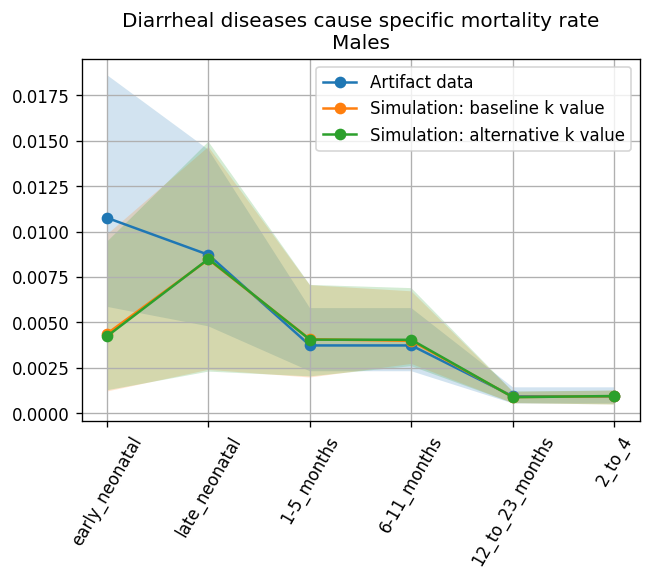

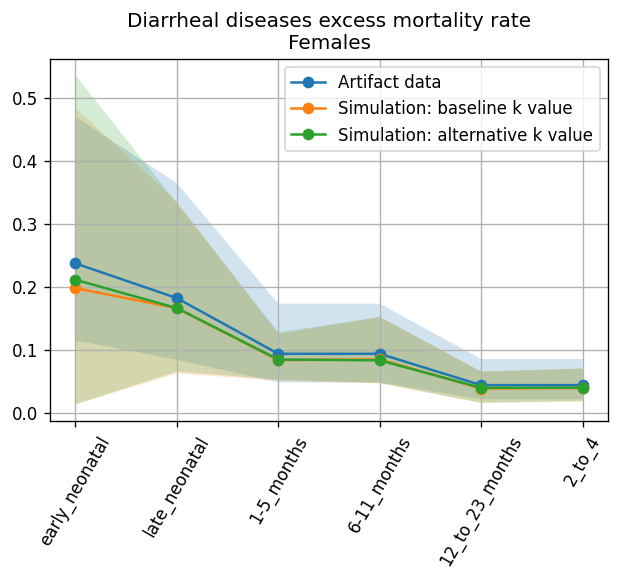

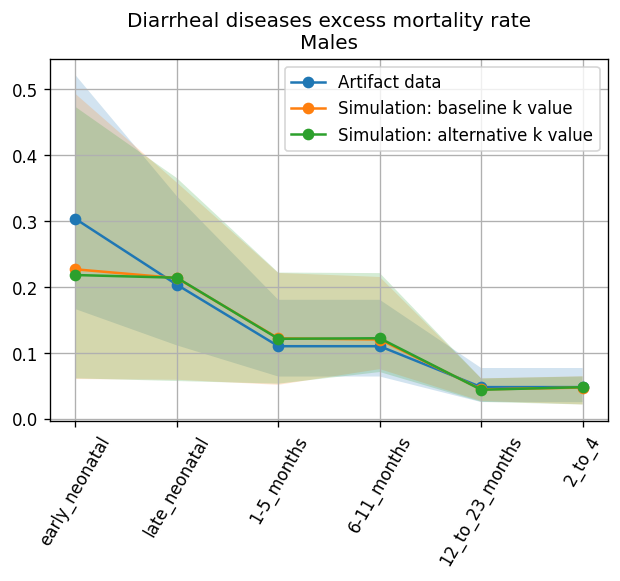

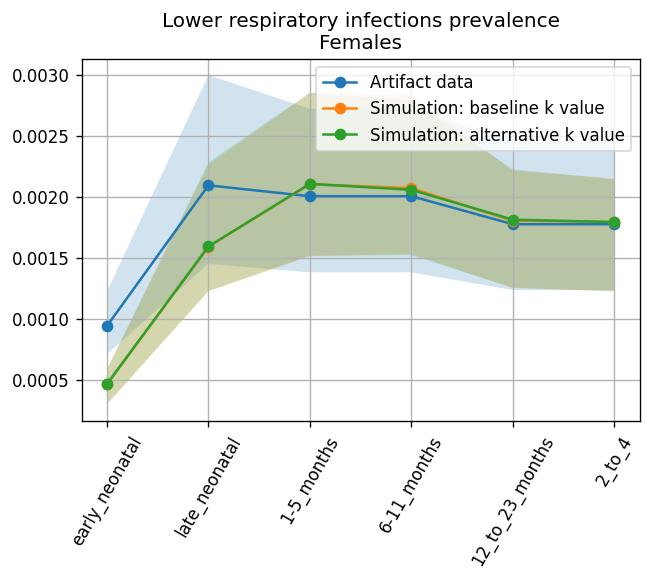

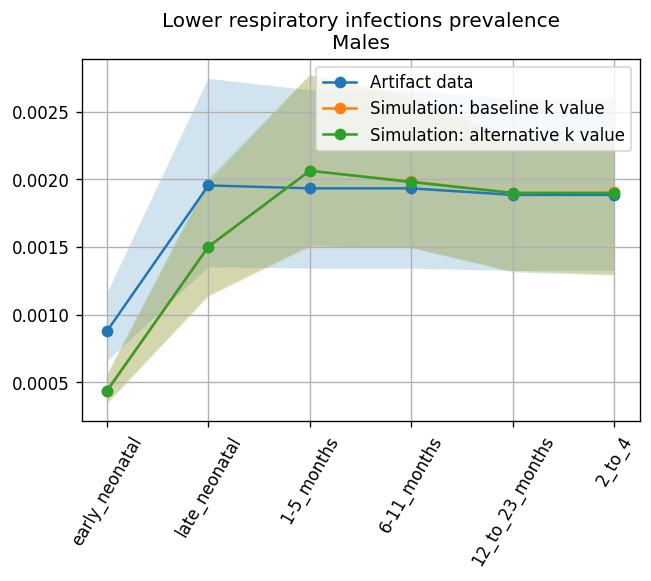

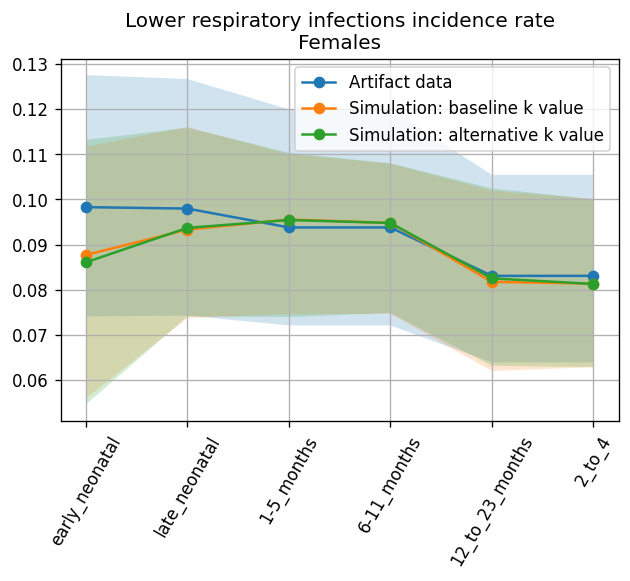

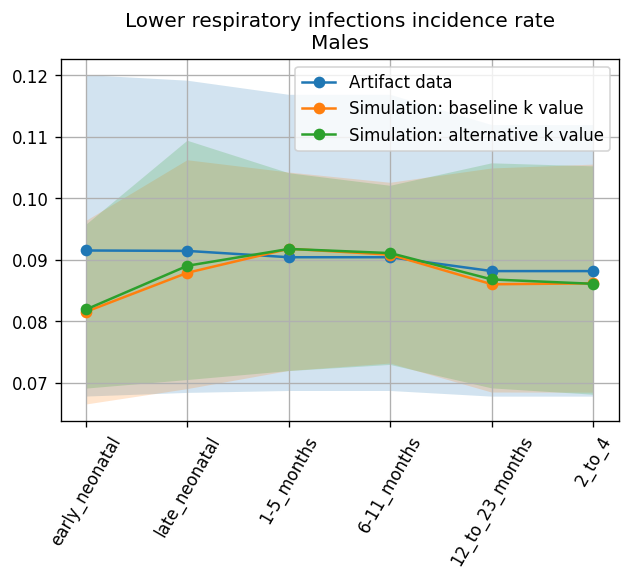

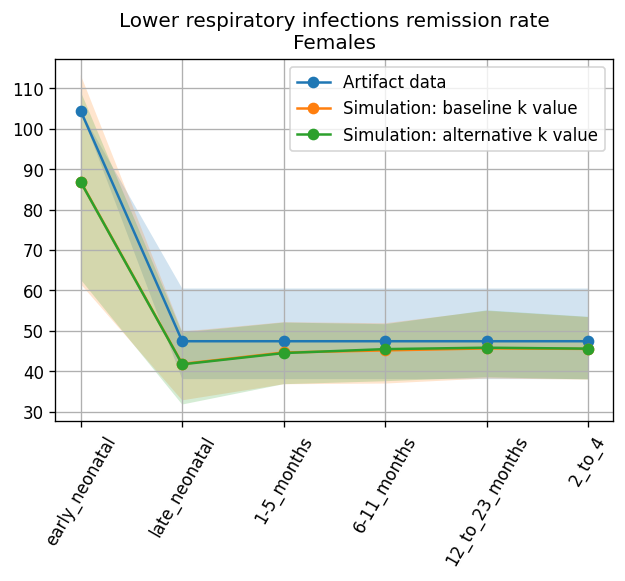

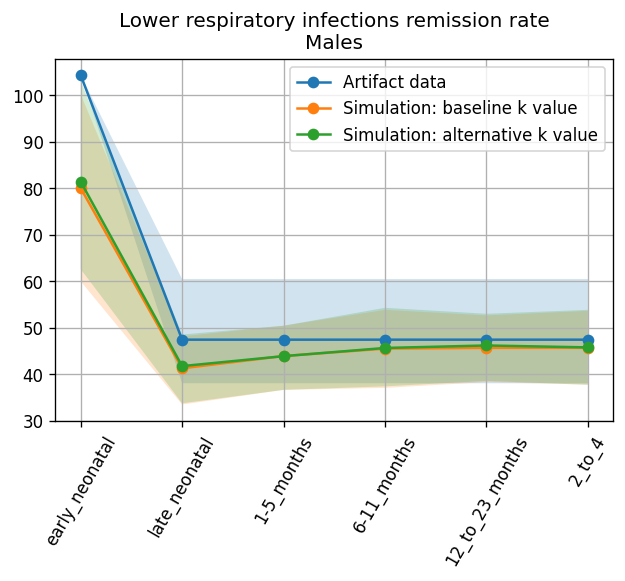

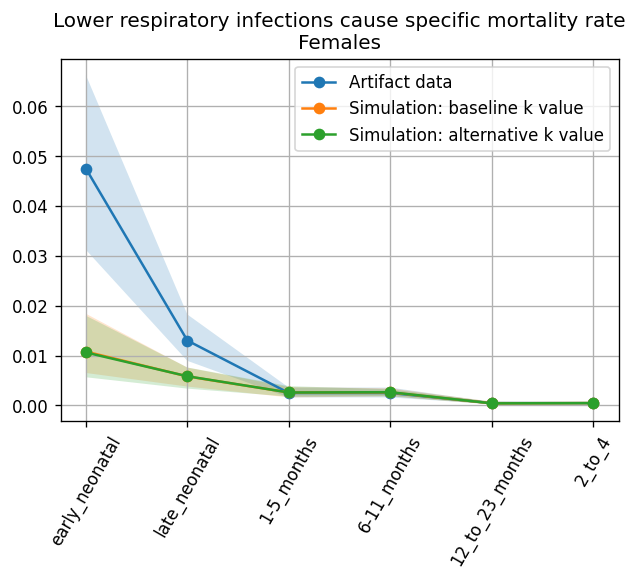

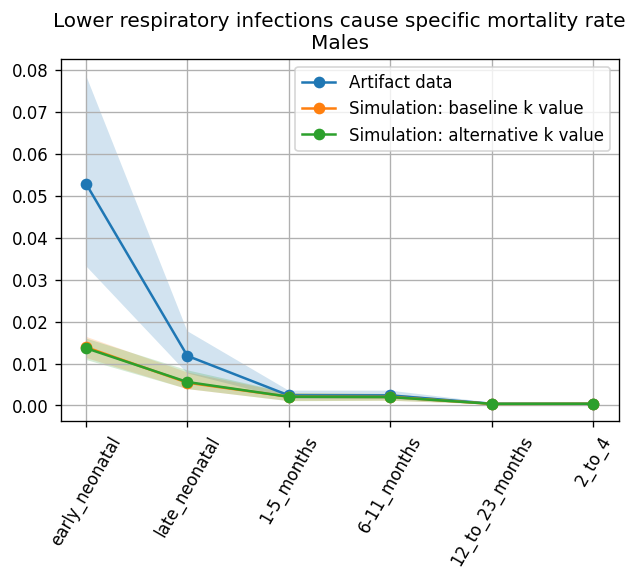

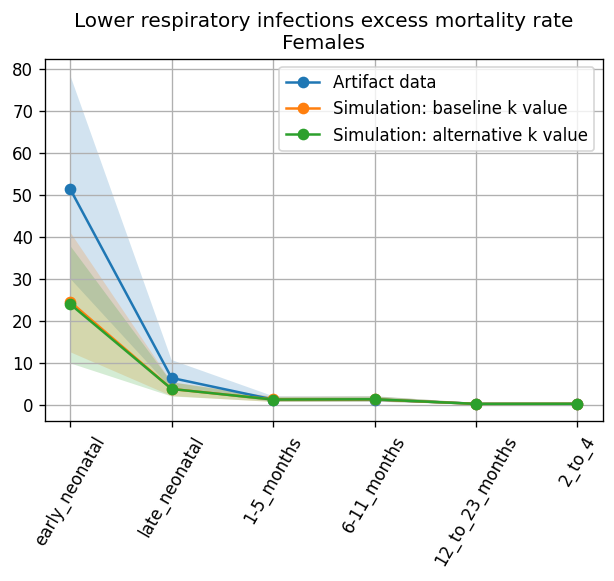

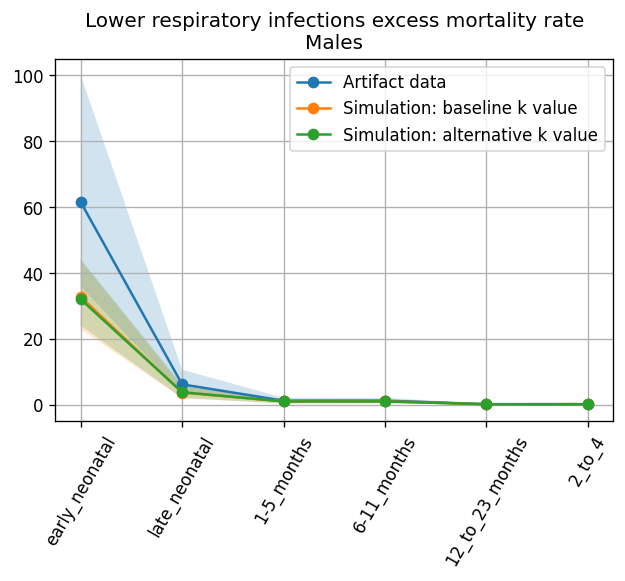

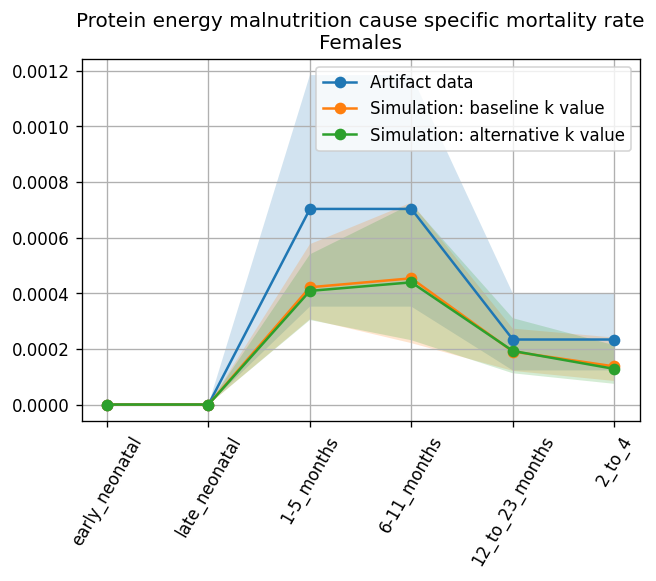

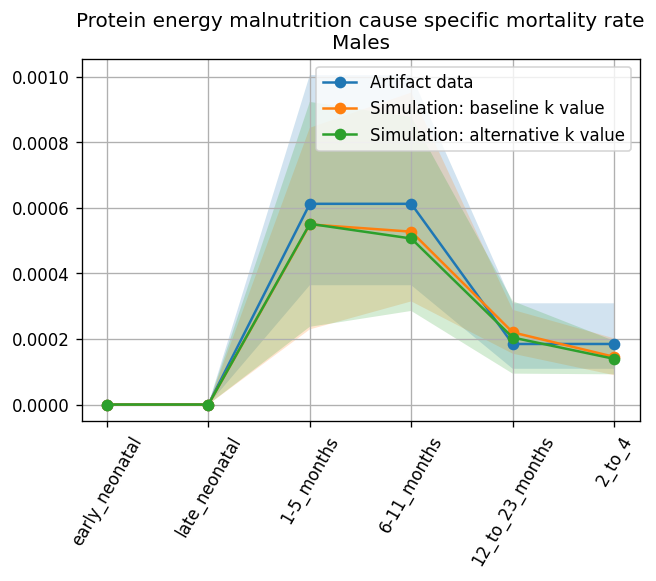

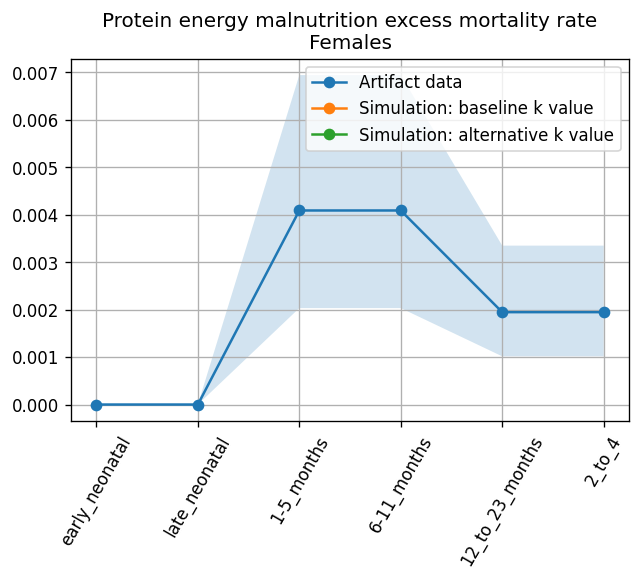

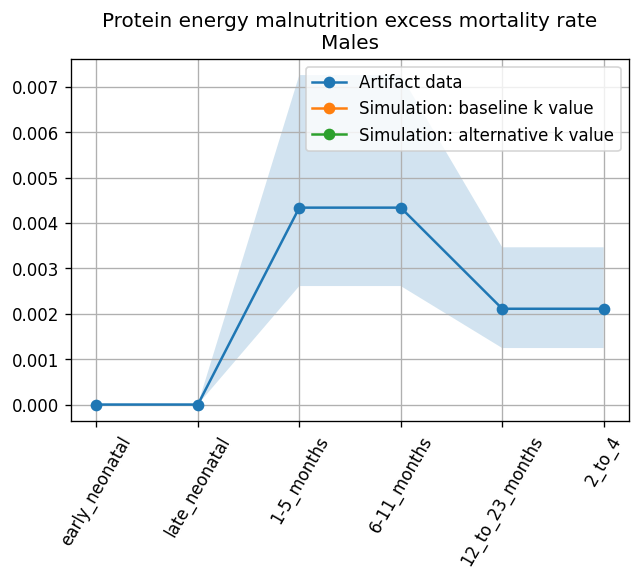

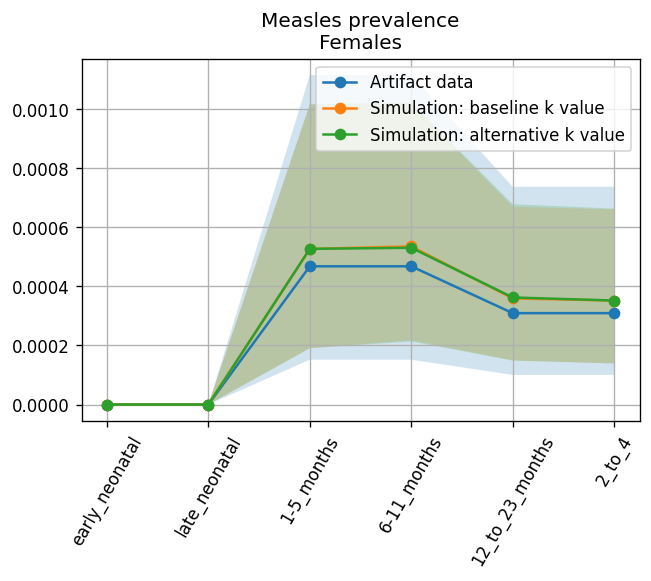

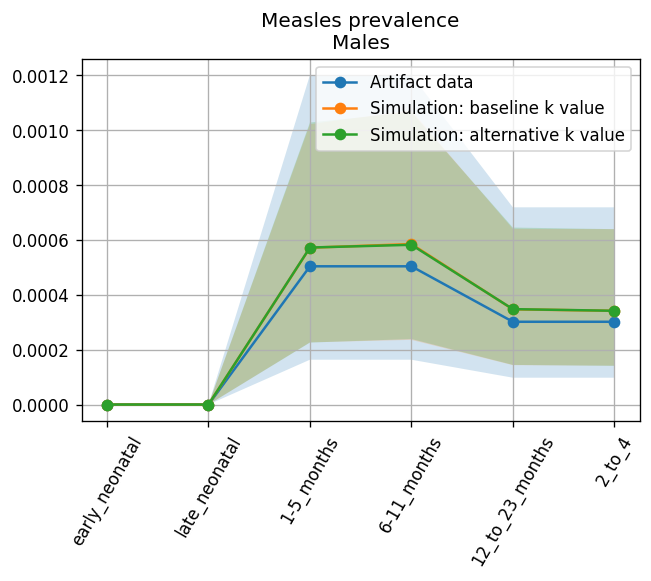

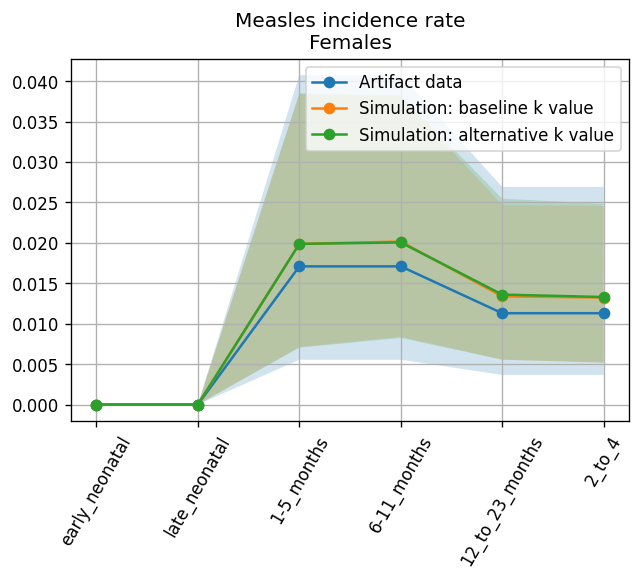

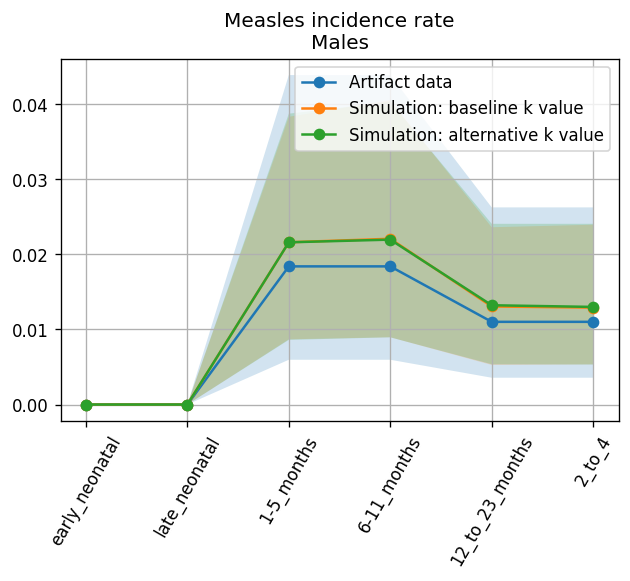

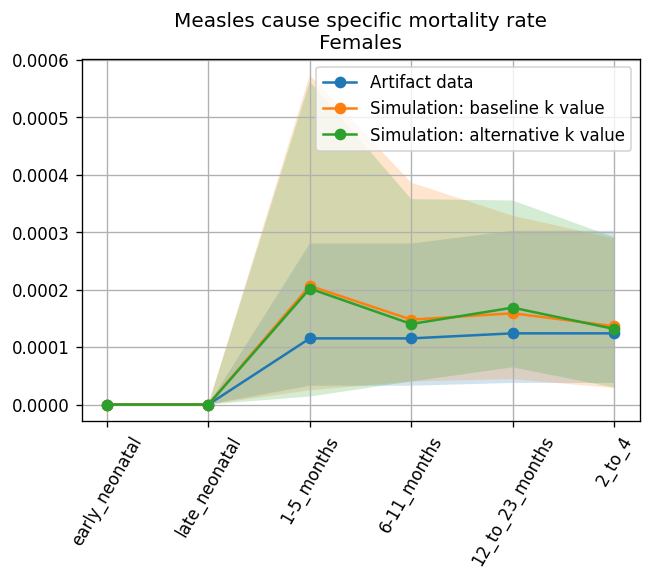

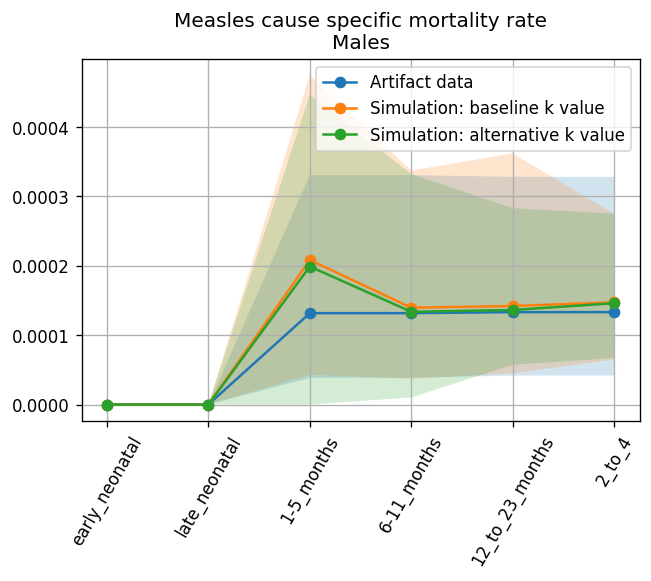

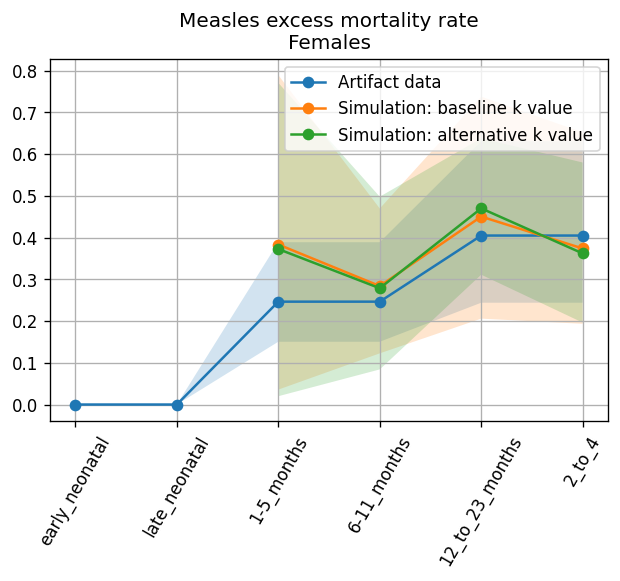

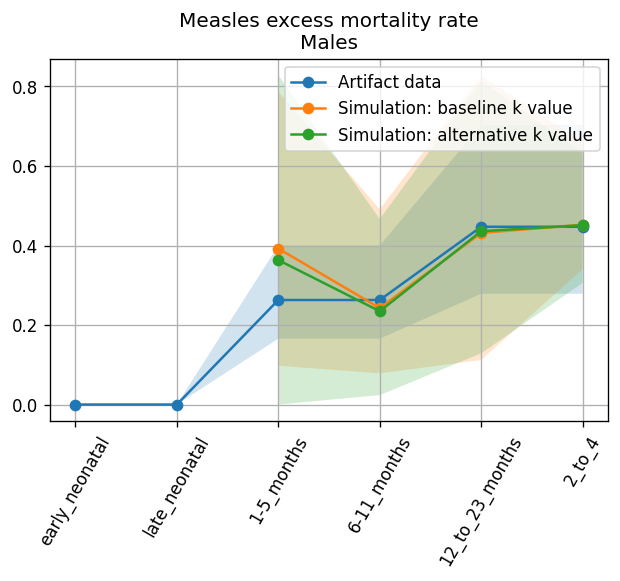

In [91]:
with PdfPages(f'plots/{figname}_cause_verification.pdf') as pdf:
    causes=['all_causes','diarrheal_diseases','lower_respiratory_infections','protein_energy_malnutrition','measles']
    measures=['prevalence','incidence_rate','remission_rate',
                   'cause_specific_mortality_rate','excess_mortality_rate']
    for cause in causes:
        for measure in measures:
            for sex in ['female','male']:
                try:
                    plot_cause_data(measure, cause, sex)
                    pdf.savefig(bbox_inches='tight')
                except:
                    pass